# **1. Preparations**

---



##    **1.1. Introduction**

This project aimed to apply an exploratory data analysis and data engineering methodology with tensorflow decision tree models to calculate house prices.

Index of main topics:
1. Preparations.
2. Exploratory data analysis.
3. Data preprocessing.
4. Feature Engineering.
5. Modeling.
6. Interpretation of results.
7. Test calculation.


## **1.2. Import of libraries**

In [ ]:
# data manipulation
import numpy as np
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# machine learning
import tensorflow as tf

You must have a sufficiently up-to-date version so that decision forests are available.

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
!pip install --upgrade tensorflow==2.12.0

In [ ]:
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 22.8 MB/s eta 0:00:00


In [ ]:
import tensorflow_decision_forests as tfdf

## **1.3. File import**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


# **2. Exploratory data analysis**

---



In the data array, the input and output variables will be defined from the project dataset and the missing values will be observed.
In Univariable study we'll just focus on the dependent variable and try to know a little bit more about it. In Bivariate we'll try to understand how the dependent variable and independent variables relate.

This is the subjective part of the project where conclusions will be made based on our knowledge. Improving our skills on the interpretation of the data that will lead us to a better resolution of the problem.

## **2.1. Data arrangement**

### **2.1.1. Obtaining the input (X) and response (y) variables**

In [ ]:
train_file_path = "/content/train.csv"
train_dataframe = pd.read_csv(train_file_path)
test_file_path = "/content/test.csv"
test_dataframe = pd.read_csv(test_file_path)

Below is the dataframe of the two datasets. There are two possible values for this field: 'numerical' or 'categorical'. 

In [ ]:
train_dataframe

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [ ]:
test_dataframe

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

Check for duplicate rows.

In [ ]:
train_dataframe.duplicated().sum()

0

In [ ]:
test_dataframe.duplicated().sum()

0

As you can see, the test data does not have the price column so that this is precisely the one that is calculated. Next, the ID column will be deleted since it is not relevant for the calculation of the estimate, in addition to other values in the tables that will be discussed later.


In [ ]:
train_dataframe = train_dataframe.drop('Id', axis=1)
test_dataframe = test_dataframe.drop('Id', axis=1)

The data is divided into 2 dataframes, one that contains all the data of "X" both from train and test in order to have a greater number of data for the exploratory data analysis and a response variable "y" from "Sale Prices".
Subsequently, a cut will be made at 1460 to divide the train and test data of the "X" variable again.

In [ ]:
X = pd.concat([train_dataframe.drop("SalePrice", axis=1),test_dataframe], axis=0, ignore_index=True)
y = train_dataframe['SalePrice']

In [ ]:
X

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2914         160       RM         21.0     1936   Pave   NaN      Reg   
2915         160       RM         21.0     1894   Pave   NaN      Reg   
2916          20       RL        160.0    20000   Pave   NaN      Reg   
2917          85       RL         62.0    10441   Pave   NaN      Reg   
2918          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1            Lvl    AllPub       FR2  ...           0        0    NaN    NaN   
2            Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
3            Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
4            Lvl    AllPub       FR2  ...           0        0    NaN    NaN   
...          ...       ...       ...  ...         ...      ...    ...    ...   
2914         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
2915         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
2916         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
2917         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
2918         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0       2    2008        WD         Normal  
1            NaN       0       5    2007        WD         Normal  
2            NaN       0       9    2008        WD         Normal  
3            NaN       0       2    2006        WD        Abnorml  
4            NaN       0      12    2008        WD         Normal  
...          ...     ...     ...     ...       ...            ...  
2914         NaN       0       6    2006        WD         Normal  
2915         NaN       0       4    2006        WD        Abnorml  
2916         NaN       0       9    2006        WD        Abnorml  
2917        Shed     700       7    2006        WD         Normal  
2918         NaN       0      11    2006        WD         Normal  

[2919 rows x 79 columns]

In [ ]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Extra information is obtained regarding the variables that were created.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


### **2.1.2 Missing values**

A first approximation is made to observe the missing values which will be treated in their respective way in the data preprocessing. It is observed that there are some columns that are going to be eliminated since you have a high percentage of missing values.

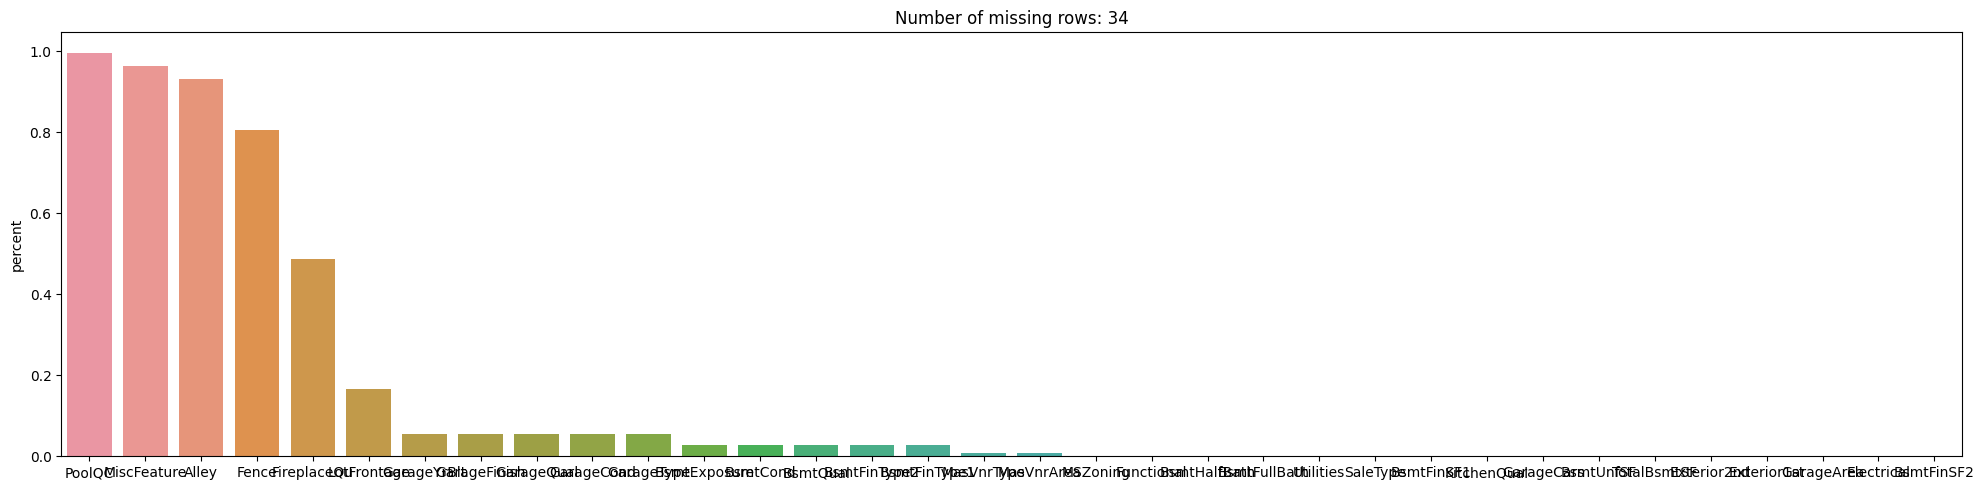

In [ ]:
missing_values = pd.DataFrame(X.isnull().sum().sort_values(ascending=False))
missing_values['percent'] = X.isnull().sum().sort_values(ascending=False) / X.shape[0]
missing_values['dtype'] = X.dtypes
missing_values = missing_values[ missing_values[0] > 0 ]
plt.figure(figsize=(20,5))
plt.title('Number of missing rows: ' + str(len(missing_values)))
sns.barplot(x=missing_values.index, y= missing_values['percent'])
plt.tight_layout()

## **2.2. Univariate analysis**

Univariate Analysis helps us to better understand all characteristics, on an individual scale. To dig even deeper into our knowledge and discover a potential pattern in the data, we will also have to find out more about the relationship between all these characteristics with each other, which is the next step in Bivariate Analysis

### **2.2.1 Numeric features**

For numerical features, we are always concerned about the distribution of these features, including the statistical characteristics of these columns e.g mean, median, mode. Hence we will usually use Distribution plot to visualize their data distribution. Boxplots are also commonly used to unearth the statistical characteristics of each feature. More often than not, we use it to look for any outliers that we might need to filter out later on during the preprocessing step.

The columns that have numerical values are selected, a variable that will be used during the construction of graphs in this subtopic.

In [ ]:
numeric_columns = X.select_dtypes(include = ['float64','int64']).columns
print(numeric_columns)
len(numeric_columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


36


**Histograma**

A skewed distribution of data refers to a situation in which the distribution of the data used to train a machine learning model does not reflect the true distribution of the data in the population of interest.

In other words, if the data used to train the model is not representative of the population in which the model will later be used, the model may be skewed and not be able to generalize well to new data. This can lead to the model performing poorly in real world situations.

It is important to be aware of data distribution bias when training machine learning models and work to minimize it through techniques.

We will typically use the histogram chart to visualize the distribution of the data.

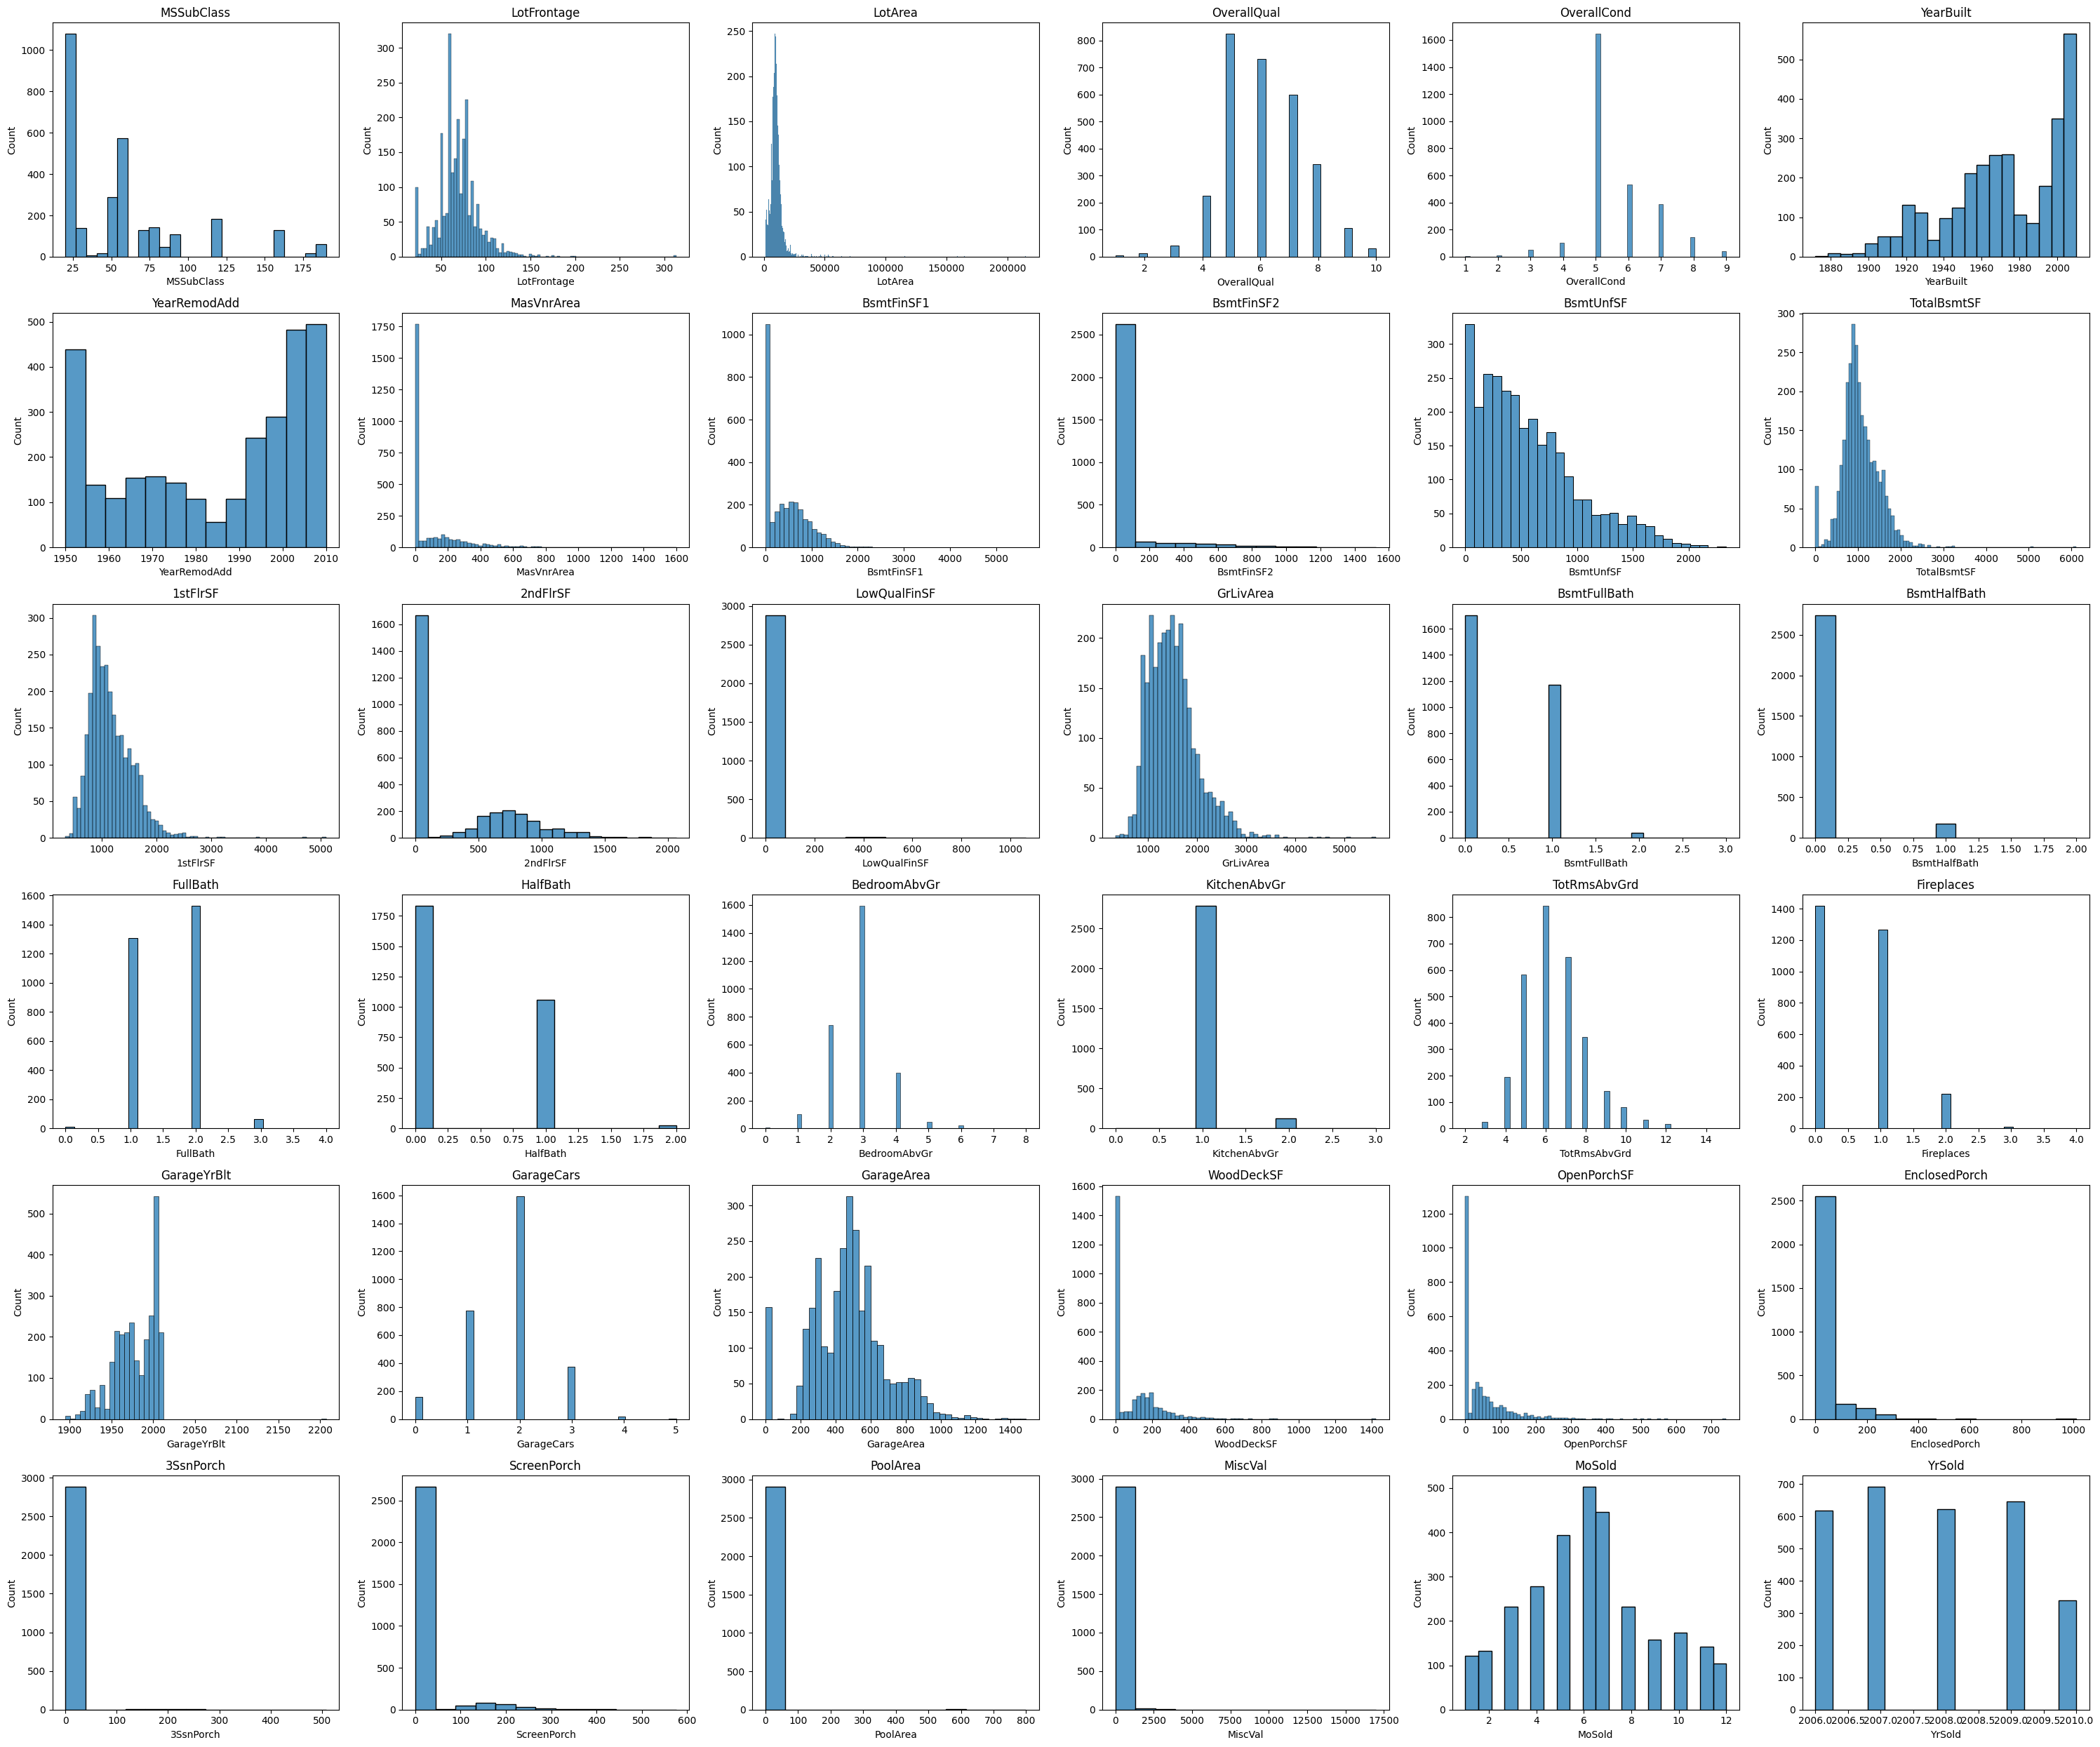

In [ ]:
fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(30, 25))
axs = axs.ravel()

for i, column in enumerate(numeric_columns):
    sns.histplot(data=X, x=column, ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()

Some of the Variables with mostly 1 value as seen from the plots above:

*   BsmtFinSF2
*   LowQualFinSF
*   EnclosedPorch
*   3SsnPorch
*   ScreenPorch
*   PoolArea
*   MiscVal

All these features are highly skewed, with mostly 0s. Having alot of 0s in the distribution doesnt really add information for predicting Housing Price. Hence, we will remove them during our preprocessing step.

**Box**

Boxplots are also commonly used to understand the statistical characteristics of each feature. Most often, we use them to look for any outliers that we may need to filter out later during the preprocessing stage.

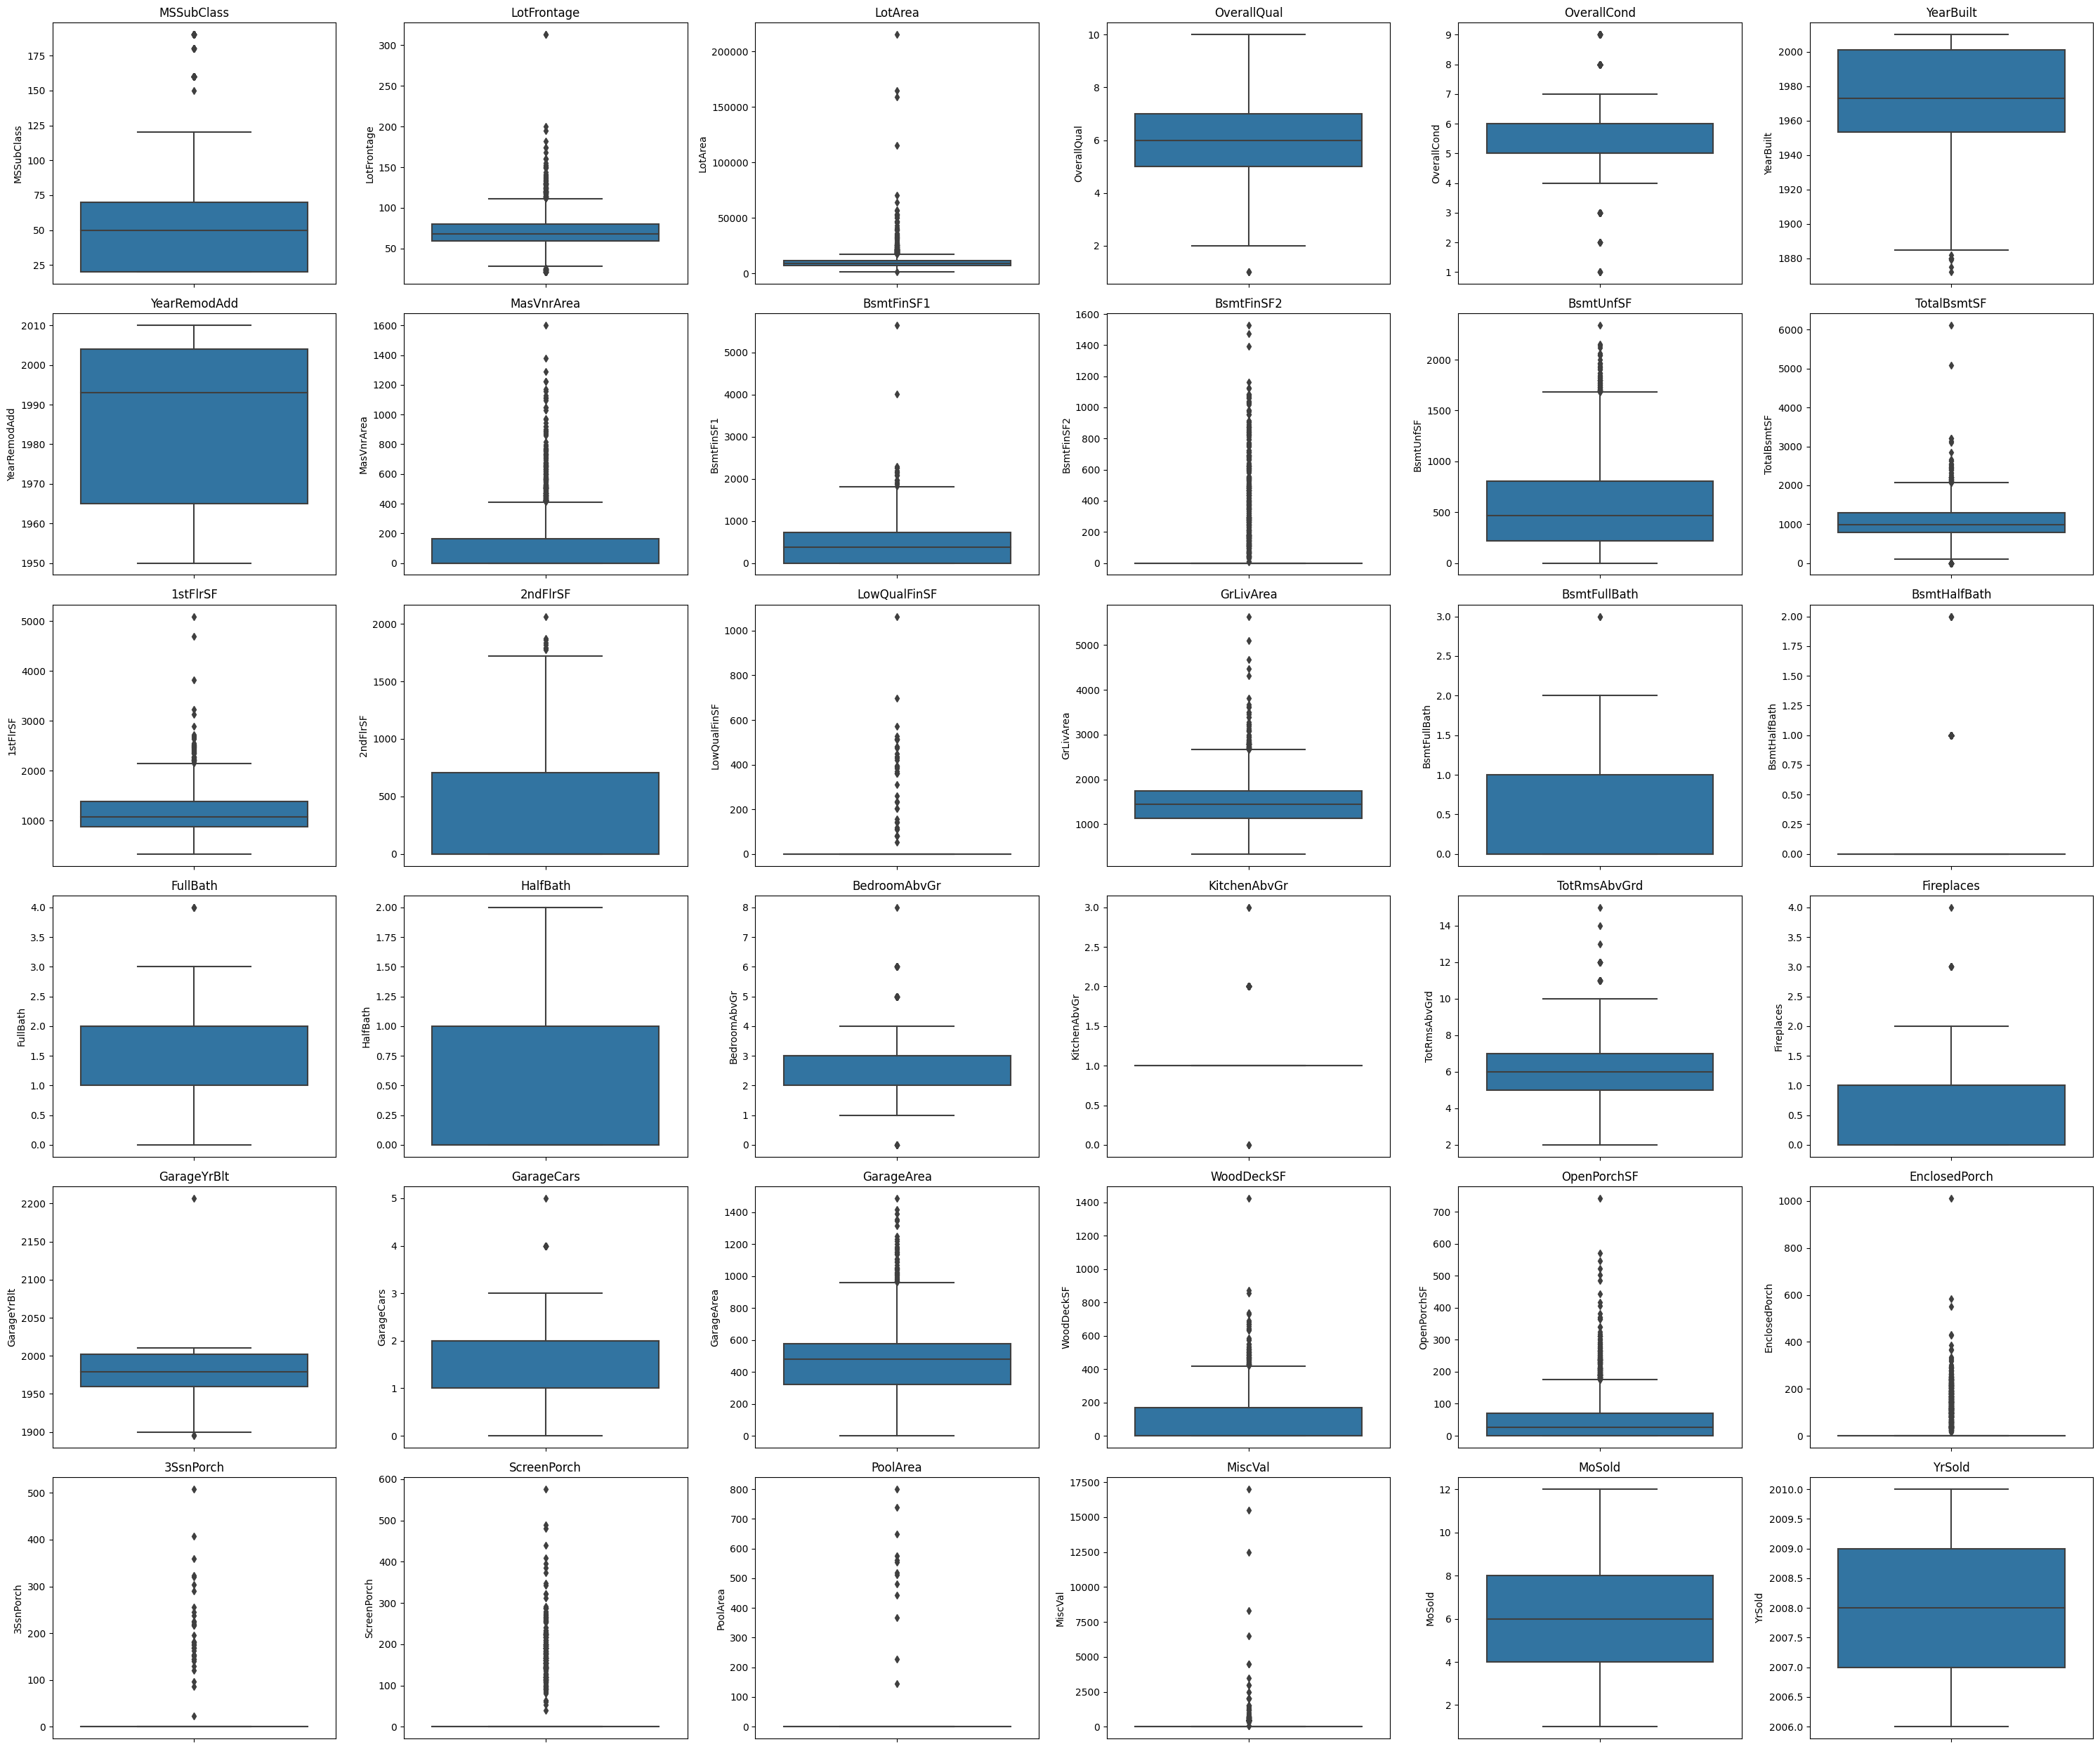

In [ ]:
fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(30, 25))
axs = axs.ravel()

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=X, y=column, ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()

In [ ]:
outliers_box = [ 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

### **2.2.2 Categorical features**

In the case of categorical features we will often use countplots to visualize the count of each distinct value within each feature. We can see for example if there are skewed data consisting mainly of only one value, which does not add any useful information. This way we can remove them later. Categorical variables are now selected for analysis.

In [ ]:
object_columns = X.select_dtypes(include='object' ).columns
print(object_columns)
len(object_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


43

In the same way, they are presented in the form of histograms to visualize which ones may be skewed.

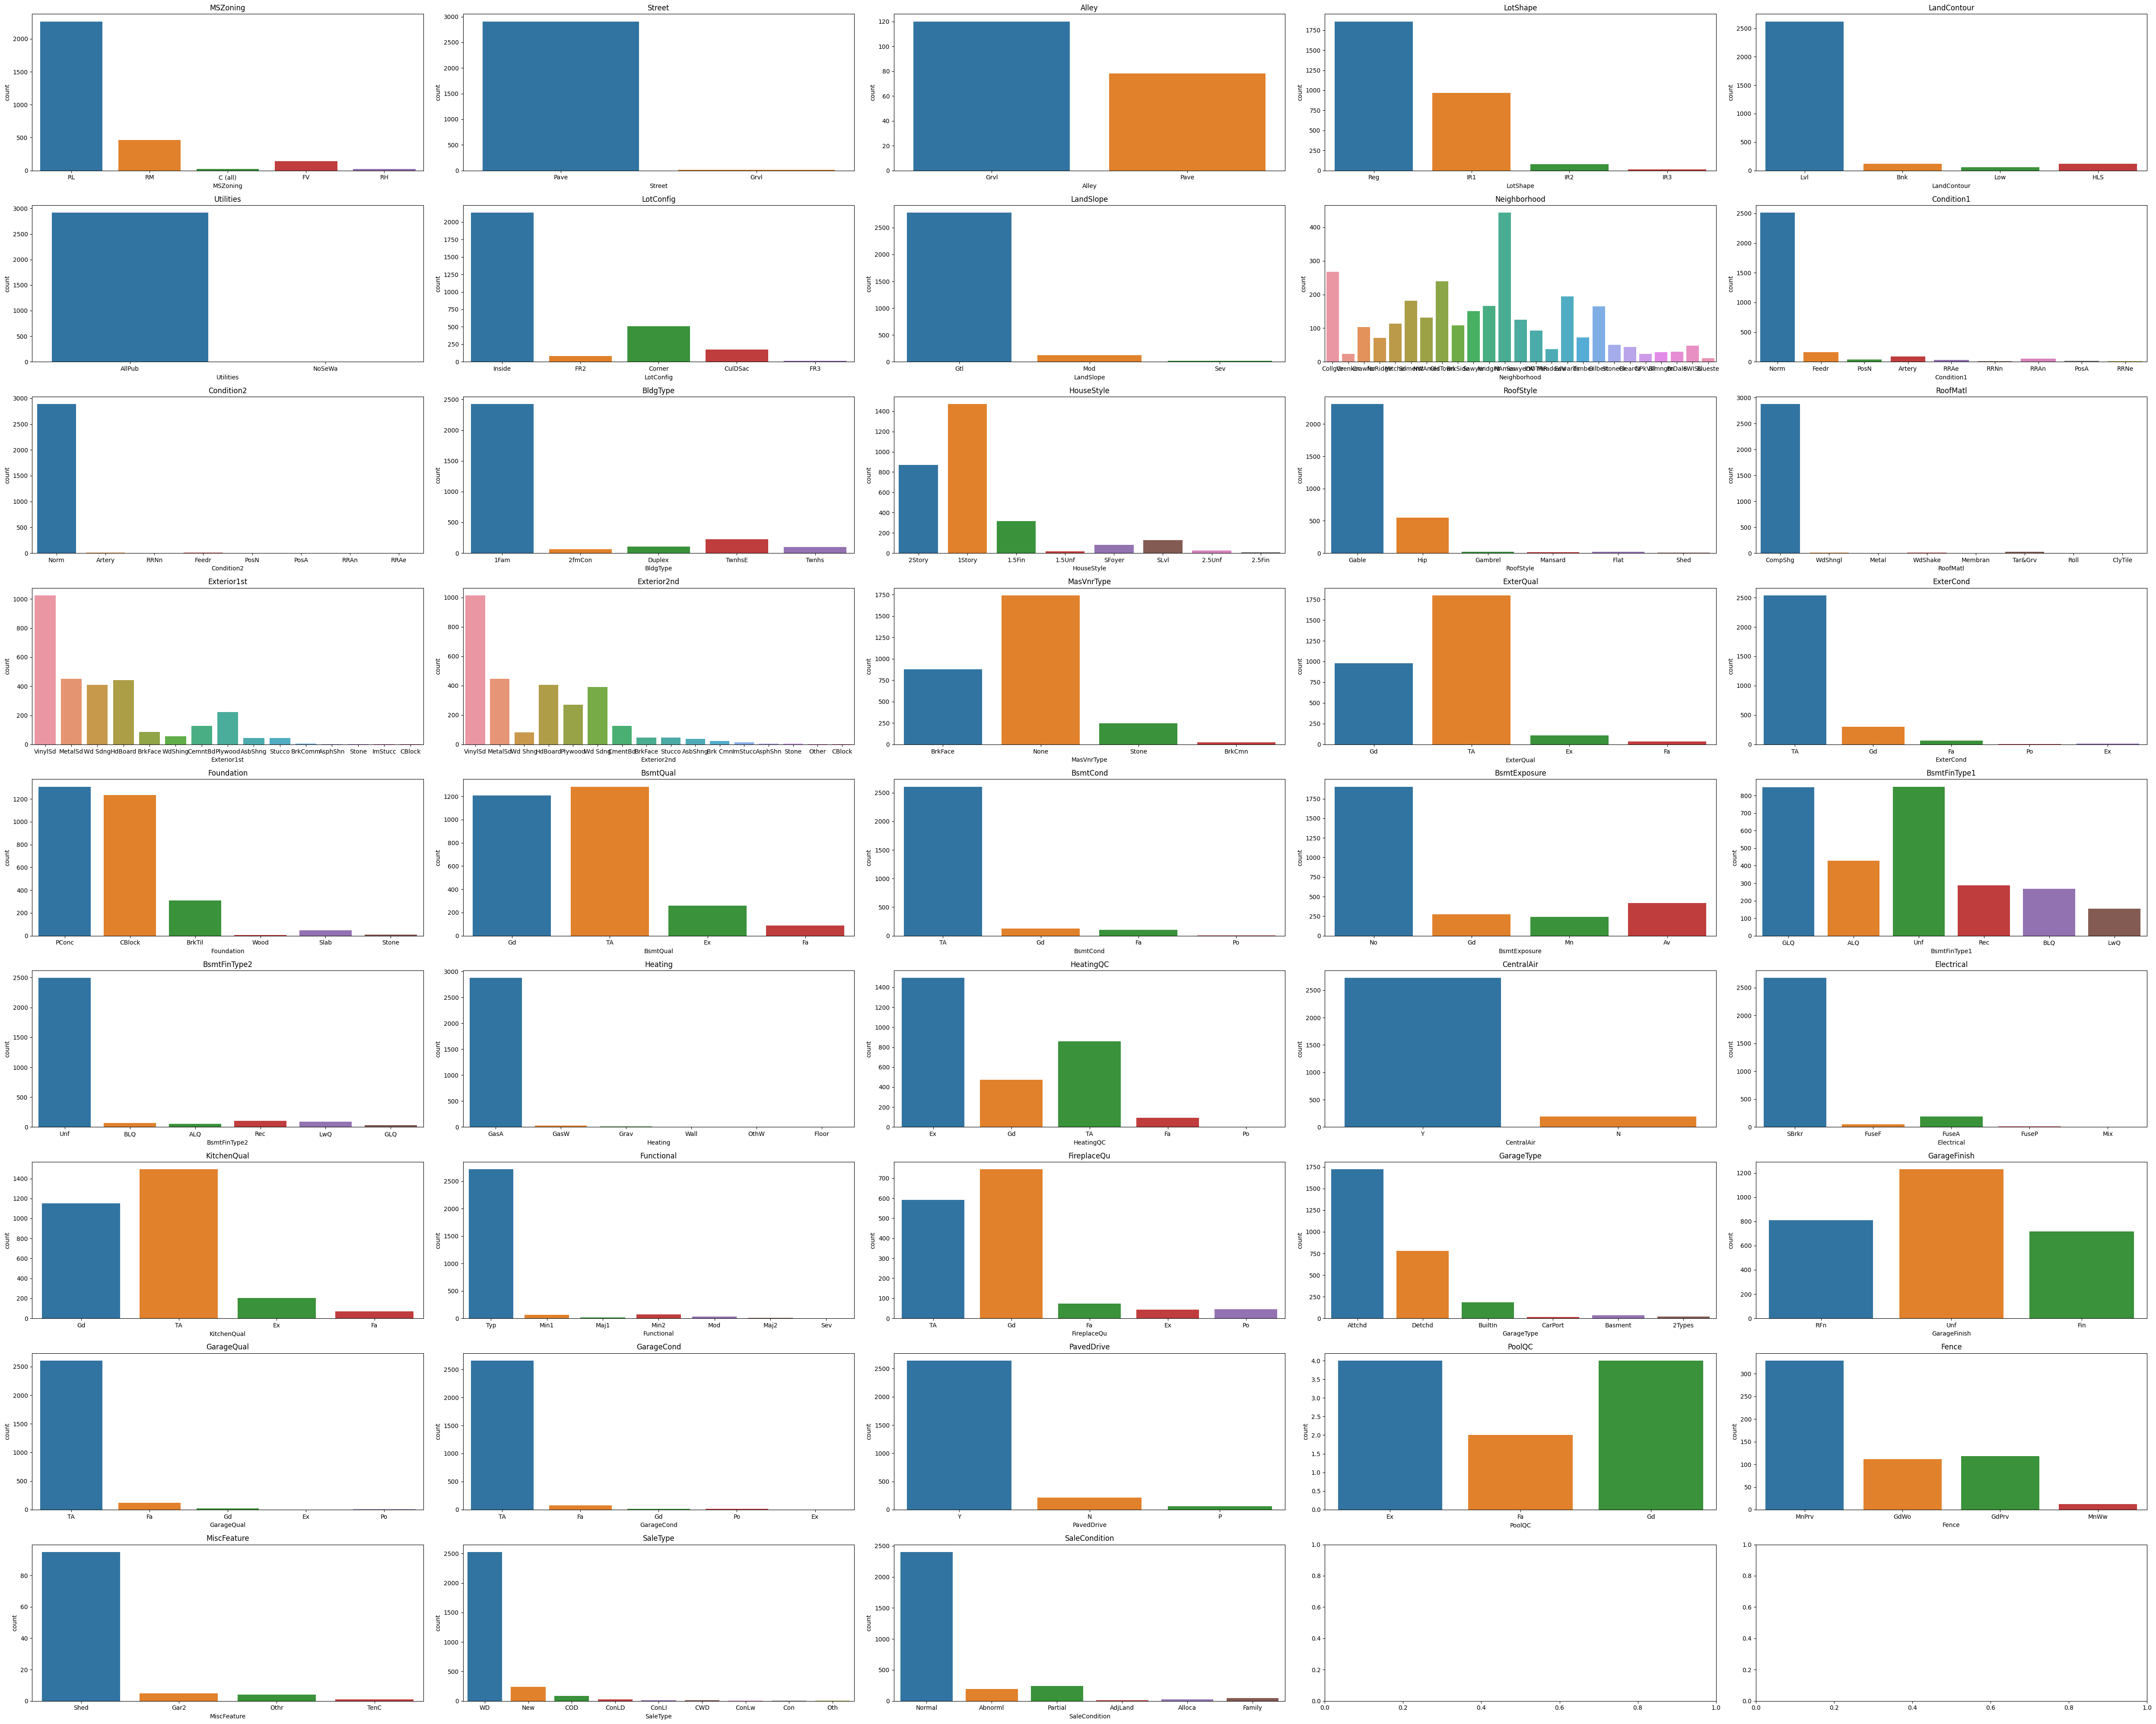

In [ ]:
fig, axs = plt.subplots(nrows=9, ncols=5, figsize=(50, 40))
axs = axs.ravel()

for i, column in enumerate(object_columns):
    sns.countplot(x=column, data=X, ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()

Column-by-column remarks.

* Street skewed
* Utilities skewed, LandSlope possibly skewed.
* Condition1 and Condition2 possibly skewed.
* RoofMatl skewed
* Heating possibly skewed
* Functional possibly skewed
* GarageQual possibly skewed
* GarageCond possibly skewed

### **2.2.3 Target**

Now it is time to visualize our most important data, that is, the response variable.

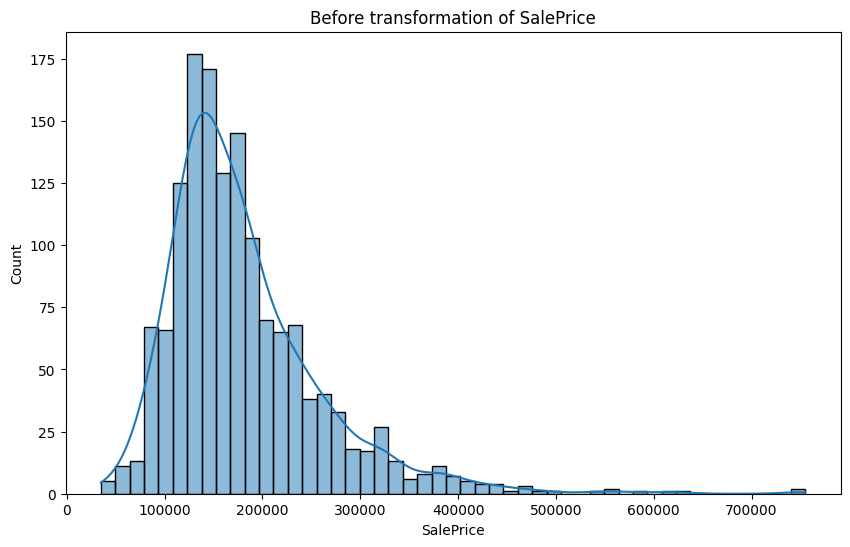

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Before transformation of SalePrice")
hist = sns.histplot(y, kde=True)

Shown with a positive skewed, there are very few outliers from most of the data.

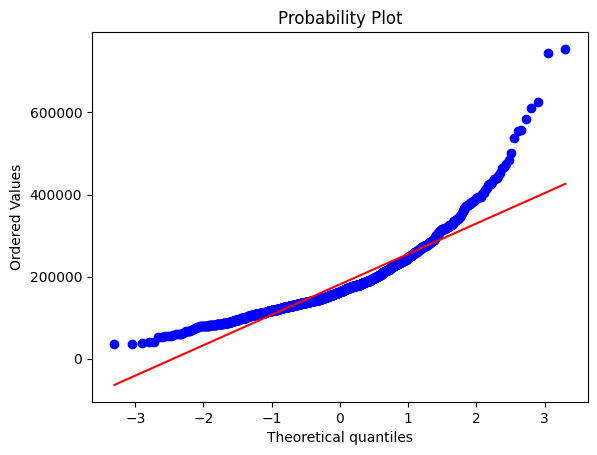

In [ ]:
probabity_plot = stats.probplot(y, plot=plt)

In addition, a deviate from the normal distribution is shown.
Have appreciable positive skewness.
Show peakedness.

In [ ]:
print("Skewness: %f" % y.skew())
print("Kurtosis: %f" % y.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## **2.3. Bivariate analisis**

Bi-variate analysis looks at 2 different features to identify any possible relationship or distinctive patterns between the 2 features. One of the commonly used technique is through the Correlation Matrix. Correlation matrix is an effective tool to uncover linear relationship between any 2 continuous features. Correlation not only allow us to determine which features are important to Saleprice, but also as a mean to investigate any multicollinearity between our independent predictors.
Multicollinearity happens when 2 or more independent variables are highly correlated with one another. In such situation, it causes precision loss in our regression coefficients, affecting our ability to identify the most important features that are most useful to our model.

### **2.3.1. Correlation Matrix**

**Matrix**

From the correlation matrix, we identify the mentioned variables that are highly correlated with each other. This finding will guide us in our preprocessing steps later, since our goal is to remove highly correlated features to avoid performance losses in our model.

<Axes: >

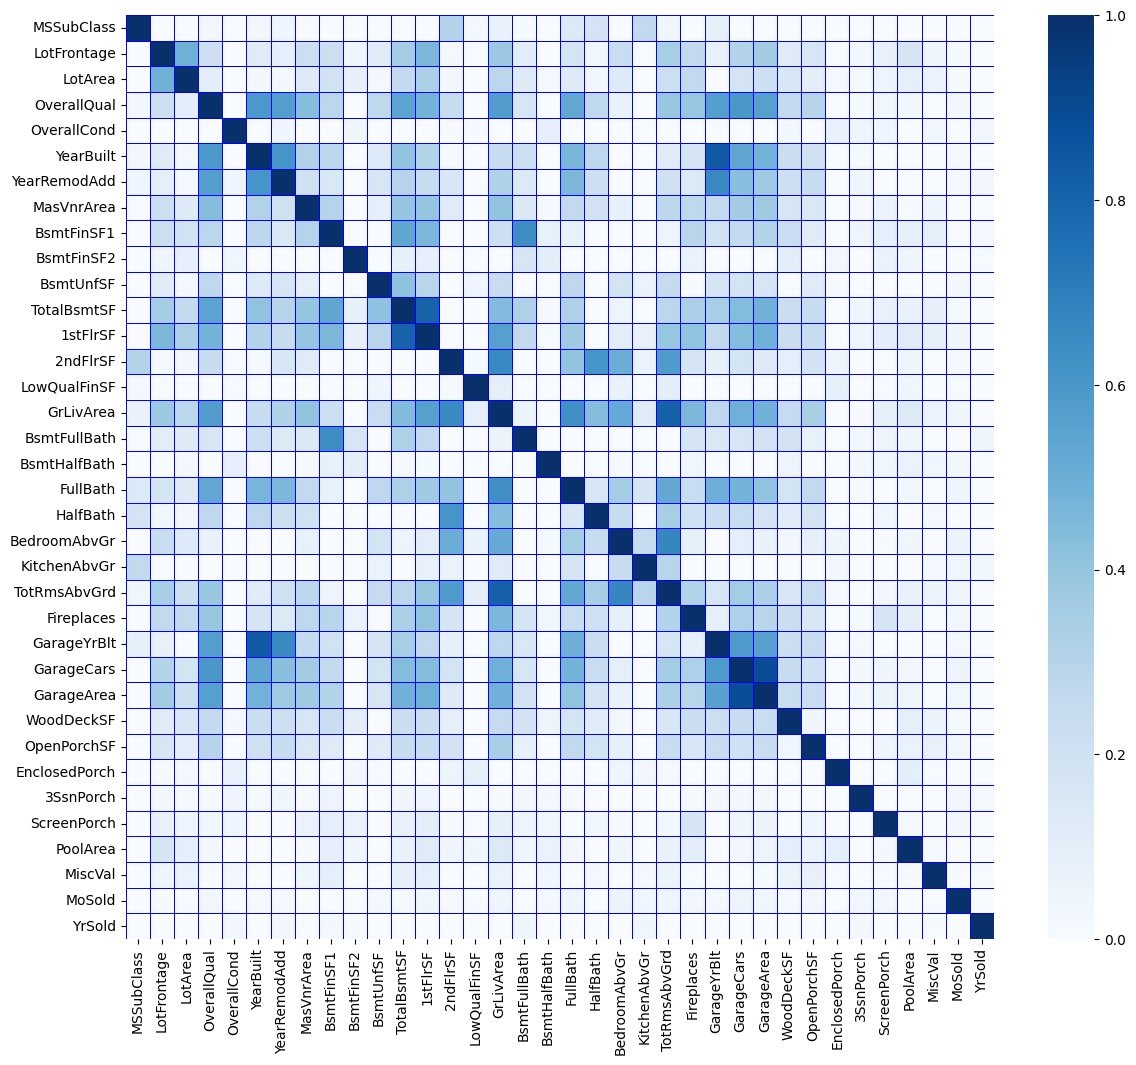

In [ ]:
plt.figure(figsize=(14,12))
correlation = X[numeric_columns].corr()
sns.heatmap(correlation, linewidth=0.5, linecolor="blue", cmap='Blues', vmin=0)

Of course, a correlation of 1 is observed between the same variables, which is why that correlation diagonal is shown. Variables such as GarageYrBlt and YearBuilt, TotRmsAbvGrd and GrLivArea, 1stFlrSF and TotalBsmtSF and
GarageArea and GarageCars show a high correlation. 

**Correlation whith the target**

Since this analysis requires the target variable found in the input dataset, and precisely because it is the most important, its correlation with the other variables is observed separately.

<Axes: >

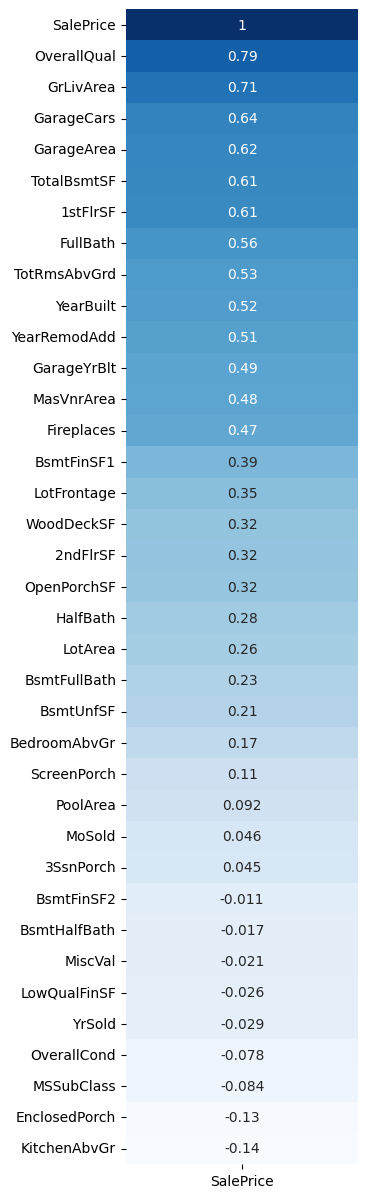

In [ ]:
correlation = train_dataframe[list(numeric_columns) + ['SalePrice']].corr()
target_correlation = correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False)
target_correlation

plt.figure(figsize=(3,15))
sns.heatmap(target_correlation, annot=True, cmap='Blues', cbar=False)

This gives us an idea that variables like "OverQuall" and "GrLivArea" will have a significant impact on the response variable.

### **2.3.3. Scatter plox**

Using scatterplot can also help us identify a potential linear relationship between numerical characteristics. While the scatterplot does not provide quantitative evidence about the strength of the linear relationship between our characteristics, it is useful in helping us visualize any kind of relationship that the correlation matrix could not calculate.

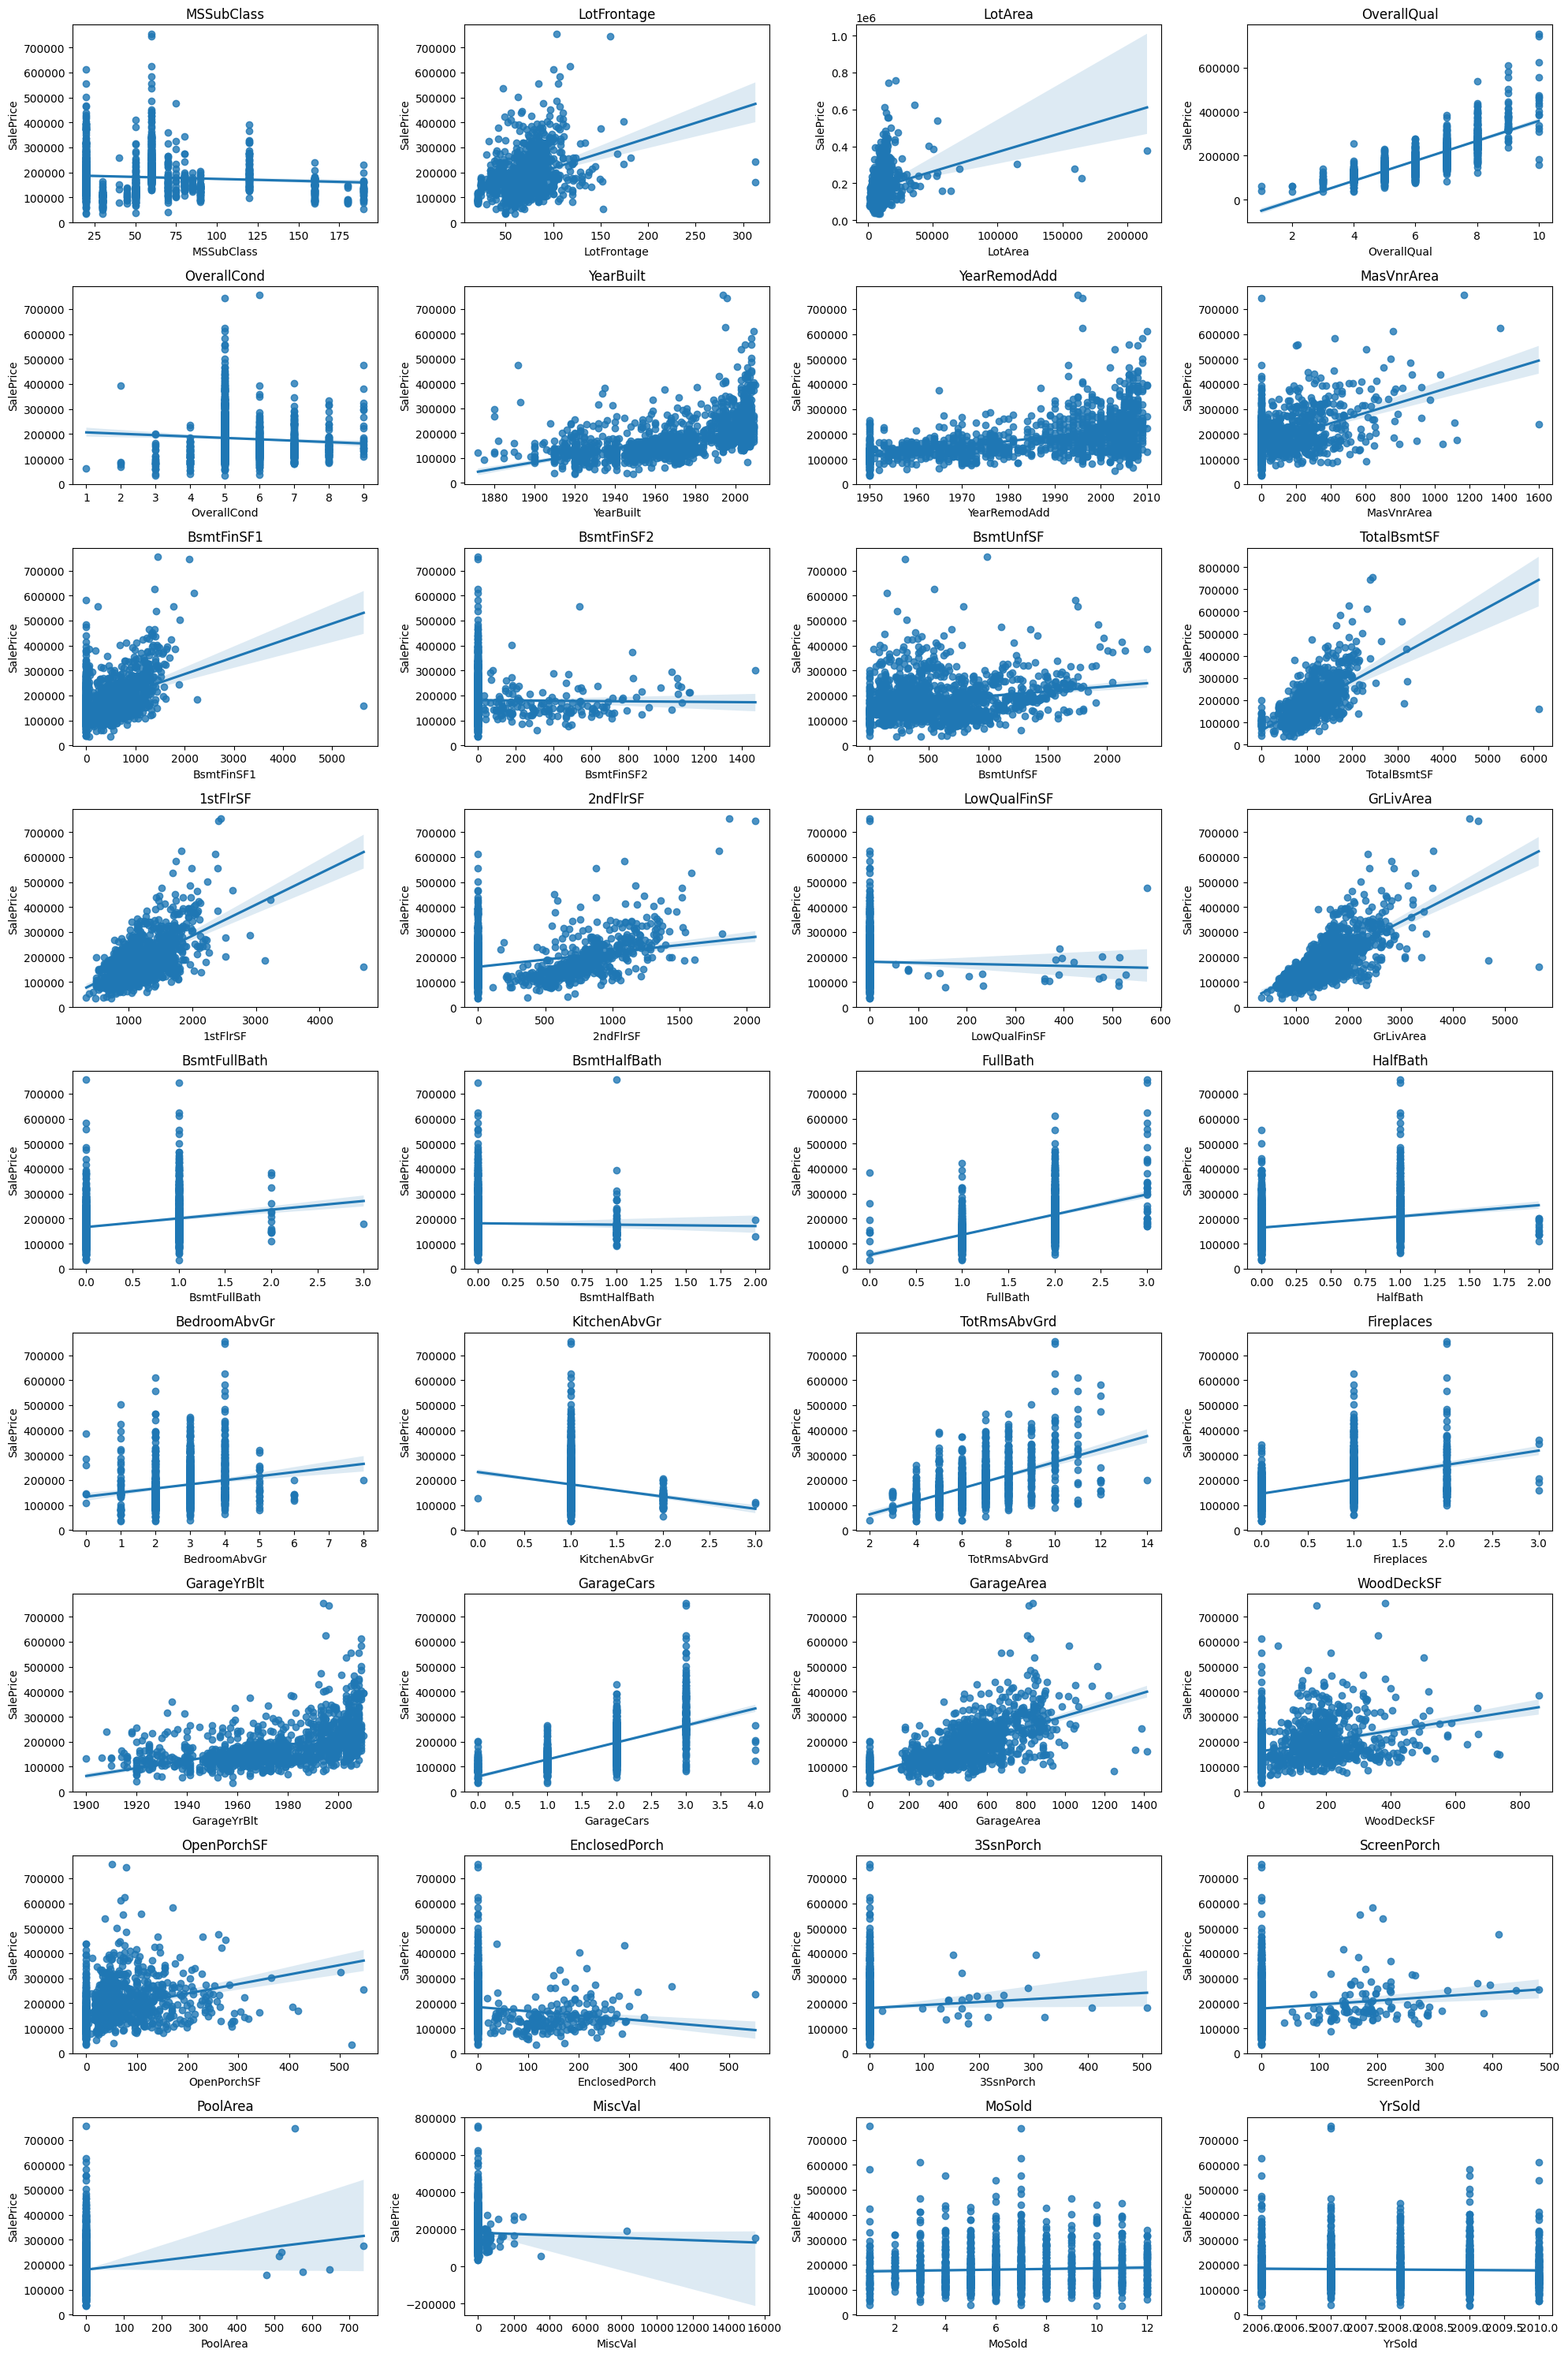

In [ ]:
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 30))
axs = axs.ravel()

for i, column in enumerate(numeric_columns):
    sns.regplot(data=train_dataframe, x=column, y='SalePrice', ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()

The only columns that do not show any form of correlation are MoSold and YrSold, we see the other variables with few values as we have seen before, and variables with strong predictive power, such as GrLivArea.

# **3. Data preprocessing**

---



In this section, we will now use objectivity and use specific data to remove variables that are not useful for the calculation, treating the outlier data, filling in the missing values of the variables appropriately and changing the data type according to need.

## **3.1. Removing redundant variables**

### **3.1.1. Missing Values**

Next, the corresponding percentage of redundant values of each variable is observed.

In [ ]:
print('missing columns values: ', missing_values.shape[0])
missing_values

missing columns values:  34


0   percent    dtype
PoolQC        2909  0.996574   object
MiscFeature   2814  0.964029   object
Alley         2721  0.932169   object
Fence         2348  0.804385   object
FireplaceQu   1420  0.486468   object
LotFrontage    486  0.166495  float64
GarageYrBlt    159  0.054471  float64
GarageFinish   159  0.054471   object
GarageQual     159  0.054471   object
GarageCond     159  0.054471   object
GarageType     157  0.053786   object
BsmtExposure    82  0.028092   object
BsmtCond        82  0.028092   object
BsmtQual        81  0.027749   object
BsmtFinType2    80  0.027407   object
BsmtFinType1    79  0.027064   object
MasVnrType      24  0.008222   object
MasVnrArea      23  0.007879  float64
MSZoning         4  0.001370   object
Functional       2  0.000685   object
BsmtHalfBath     2  0.000685  float64
BsmtFullBath     2  0.000685  float64
Utilities        2  0.000685   object
SaleType         1  0.000343   object
BsmtFinSF1       1  0.000343  float64
KitchenQual      1  0.000343   object
GarageCars       1  0.000343  float64
BsmtUnfSF        1  0.000343  float64
TotalBsmtSF      1  0.000343  float64
Exterior2nd      1  0.000343   object
Exterior1st      1  0.000343   object
GarageArea       1  0.000343  float64
Electrical       1  0.000343   object
BsmtFinSF2       1  0.000343  float64

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases.

In [ ]:
drop_columns = []

for i in range(len(missing_values.columns)):
  if missing_values["percent"][i] > 0.85:
      colname = missing_values.index[i]
      drop_columns.append(colname)

drop_columns

['PoolQC', 'MiscFeature', 'Alley']

In [ ]:
X = X.drop(drop_columns, axis=1)

### **3.1.2. Multicollinearity**

The criterion taken to remove variables with high correlation between them is a percentage greater than 80%.

In [ ]:
high_corr_cols = []
for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) > 0.8:
            colname = correlation.columns[i]
            high_corr_cols.append(colname)

high_corr_cols

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']

In [ ]:
X = X.drop(high_corr_cols, axis=1)

### **3.1.3. Features not important in predicting the Target**

Variables that have no impact on the target variable were previously observed.

In [ ]:
not_relevant = ['MoSold', 'YrSold']

The graphs that have no impact are observed.

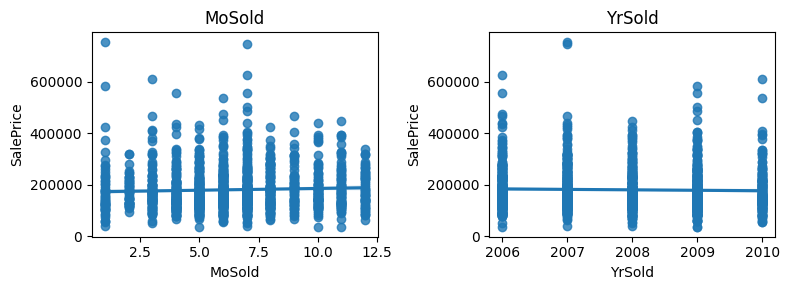

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axs = axs.ravel()

for i, column in enumerate(not_relevant):
    sns.regplot(data=train_dataframe, x=column, y='SalePrice', ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()

In [ ]:
X = X.drop(not_relevant, axis=1)

### **3.1.4. Removing based features**

Variables that have a normalization greater than 0.9 are observed.

In [ ]:
skewed = pd.DataFrame()
rows = []

for column in X.columns:
  new_row = {
      'index': column,
      'count': len(X[column].value_counts(normalize=True)),
      'max_normalize': X[column].value_counts(normalize=True).max(),
      'values': list(X[column].value_counts(normalize=True).sort_values(ascending=False).index)
  }
  rows.append(new_row)

skewed = pd.concat([skewed, pd.DataFrame(rows)], ignore_index=True)
skewed = skewed.sort_values(by='max_normalize', ascending=False).set_index('index')
skewed[skewed['max_normalize'] > 0.9]


count  max_normalize  \
index                                
Utilities         2       0.999657   
Street            2       0.995889   
PoolArea         14       0.995546   
Condition2        8       0.989723   
3SsnPorch        31       0.987324   
LowQualFinSF     36       0.986297   
RoofMatl          8       0.985269   
Heating           6       0.984584   
MiscVal          38       0.964714   
GarageCond        5       0.961594   
KitchenAbvGr      4       0.954094   
LandSlope         3       0.951696   
GarageQual        5       0.943478   
BsmtHalfBath      3       0.940007   
CentralAir        2       0.932854   
Functional        7       0.931436   
BsmtCond          4       0.918576   
Electrical        5       0.915353   
ScreenPorch     121       0.912299   
PavedDrive        3       0.904762   

                                                         values  
index                                                            
Utilities                                      [AllPub, NoSeWa]  
Street                                             [Pave, Grvl]  
PoolArea      [0, 512, 648, 576, 555, 480, 519, 738, 144, 36...  
Condition2    [Norm, Feedr, Artery, PosN, PosA, RRNn, RRAn, ...  
3SsnPorch     [0, 153, 168, 144, 216, 180, 182, 96, 320, 23,...  
LowQualFinSF  [0, 80, 205, 360, 390, 232, 53, 515, 156, 473,...  
RoofMatl      [CompShg, Tar&Grv, WdShake, WdShngl, Metal, Me...  
Heating                   [GasA, GasW, Grav, Wall, OthW, Floor]  
MiscVal       [0, 400, 500, 450, 600, 2000, 700, 1500, 650, ...  
GarageCond                                 [TA, Fa, Gd, Po, Ex]  
KitchenAbvGr                                       [1, 2, 0, 3]  
LandSlope                                       [Gtl, Mod, Sev]  
GarageQual                                 [TA, Fa, Gd, Po, Ex]  
BsmtHalfBath                                    [0.0, 1.0, 2.0]  
CentralAir                                               [Y, N]  
Functional              [Typ, Min2, Min1, Mod, Maj1, Maj2, Sev]  
BsmtCond                                       [TA, Gd, Fa, Po]  
Electrical                    [SBrkr, FuseA, FuseF, FuseP, Mix]  
ScreenPorch   [0, 144, 192, 168, 120, 216, 200, 180, 160, 22...  
PavedDrive                                            [Y, N, P]

It is determined that variables with a maximum normalization of 96%.

In [ ]:
threshold = 0.96
skewed_threshold = list(skewed[ skewed['max_normalize'] >= threshold].index)
skewed_threshold

['Utilities',
 'Street',
 'PoolArea',
 'Condition2',
 '3SsnPorch',
 'LowQualFinSF',
 'RoofMatl',
 'Heating',
 'MiscVal',
 'GarageCond']

In [ ]:
X = X.drop(skewed_threshold, axis=1)

## **3.2. Dealing with Outliers**

In this section, columns of variables are no longer eliminated, but rows of the training dataset that contain atypical variables that may affect the learning of the model.

In [ ]:
outliers_box

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [ ]:
previous_removed = ['1stFlrSF', 'GarageArea']
outliers = set(outliers_box) - set(previous_removed)

The variables selected in the exploratory data analysis are observed.

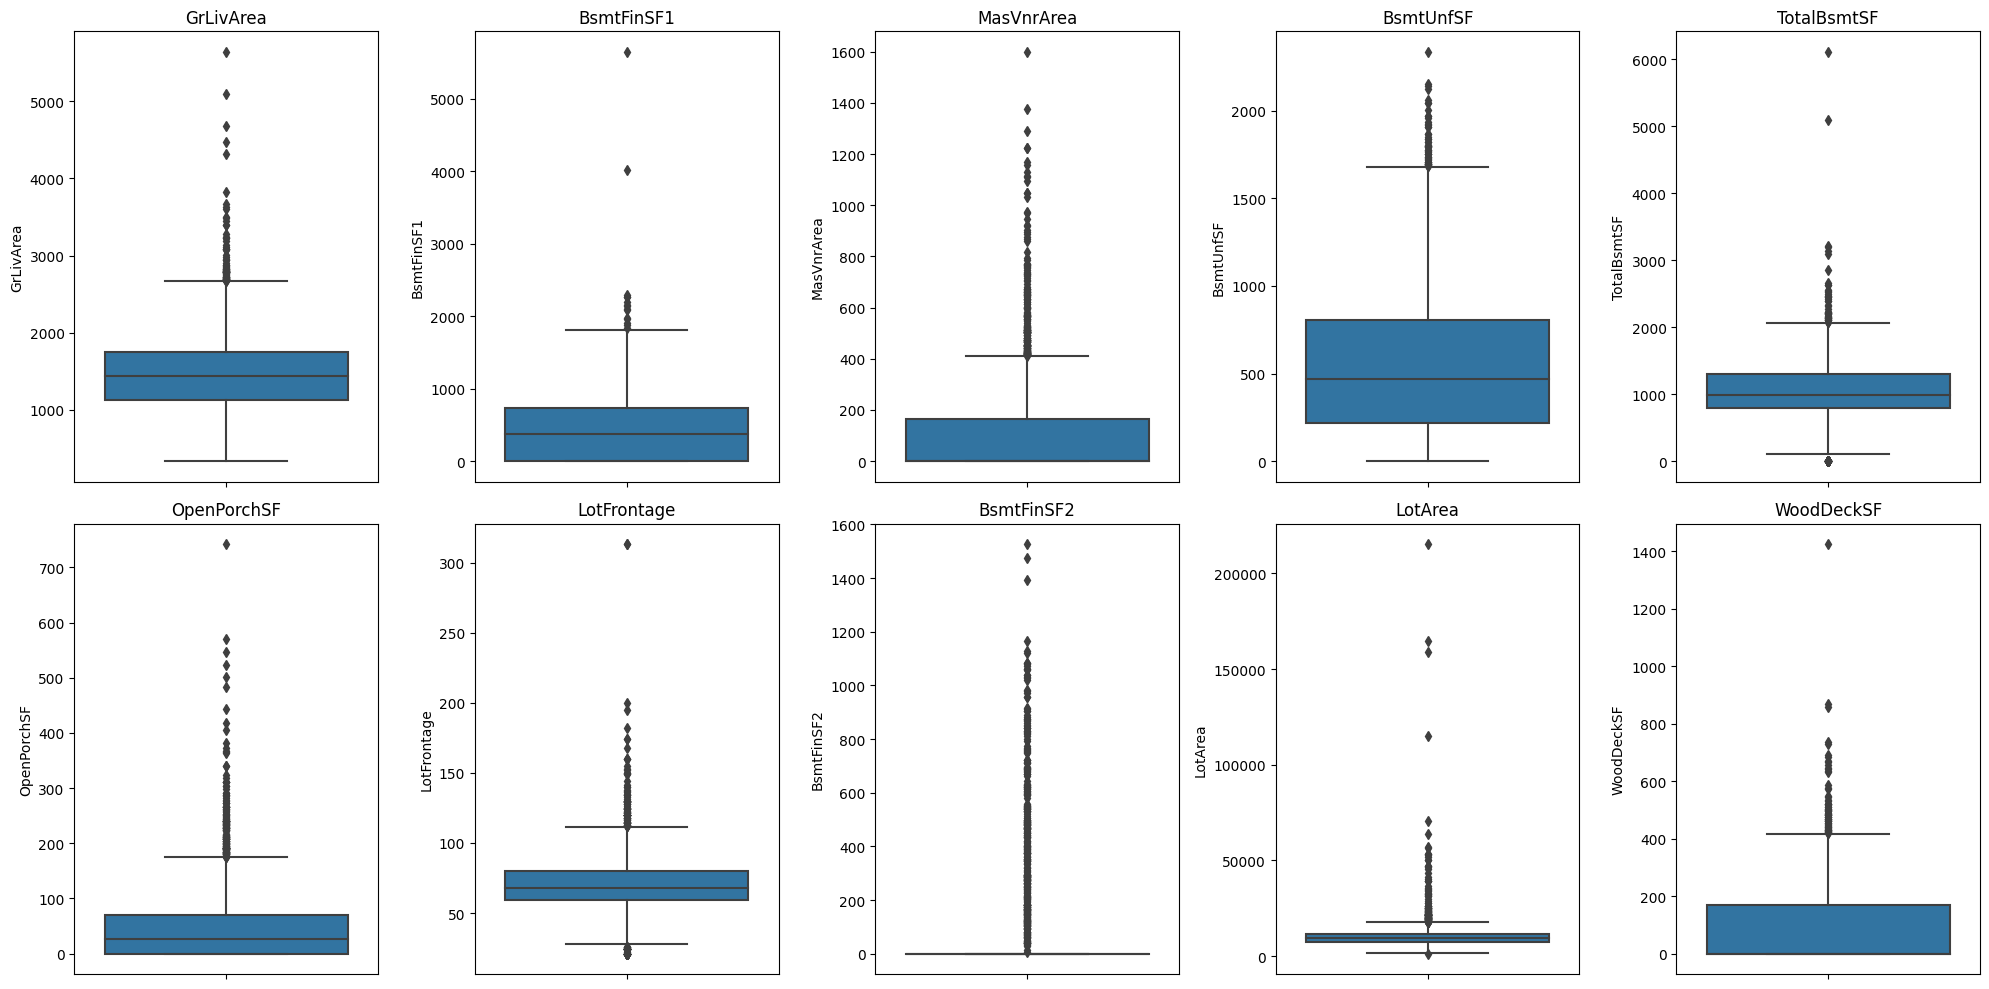

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axs = axs.ravel()
for i, column in enumerate(outliers):
    sns.boxplot(data=X, y=column, ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()

This value is adjusted manually, a range is established for a data that is very far from the others. To avoid any problem when re-dividing the variable X into training and test data, a copy of the test variables is taken as a reference to select the rows that will be in the final dataset.

In [ ]:
train_outliers_drop = train_dataframe.copy()

In [ ]:
train_outliers_drop = train_outliers_drop.drop(train_outliers_drop[train_outliers_drop['LotFrontage'] > 200].index)
train_outliers_drop = train_outliers_drop.drop(train_outliers_drop[train_outliers_drop['LotArea'] > 100000].index)
train_outliers_drop = train_outliers_drop.drop(train_outliers_drop[train_outliers_drop['BsmtFinSF1'] > 4000].index)
train_outliers_drop = train_outliers_drop.drop(train_outliers_drop[train_outliers_drop['TotalBsmtSF'] > 5000].index)
train_outliers_drop = train_outliers_drop.drop(train_outliers_drop[train_outliers_drop['BsmtUnfSF'] > 2300].index)
train_outliers_drop = train_outliers_drop.drop(train_outliers_drop[train_outliers_drop['WoodDeckSF'] > 800].index)
train_outliers_drop = train_outliers_drop.drop(train_outliers_drop[train_outliers_drop['MasVnrArea'] > 1200].index)
train_outliers_drop = train_outliers_drop.drop(train_outliers_drop[train_outliers_drop['OpenPorchSF'] > 500].index)
train_outliers_drop = train_outliers_drop.drop(train_outliers_drop[train_outliers_drop['BsmtFinSF2'] > 1200].index)

Now the fixed variables are observed.

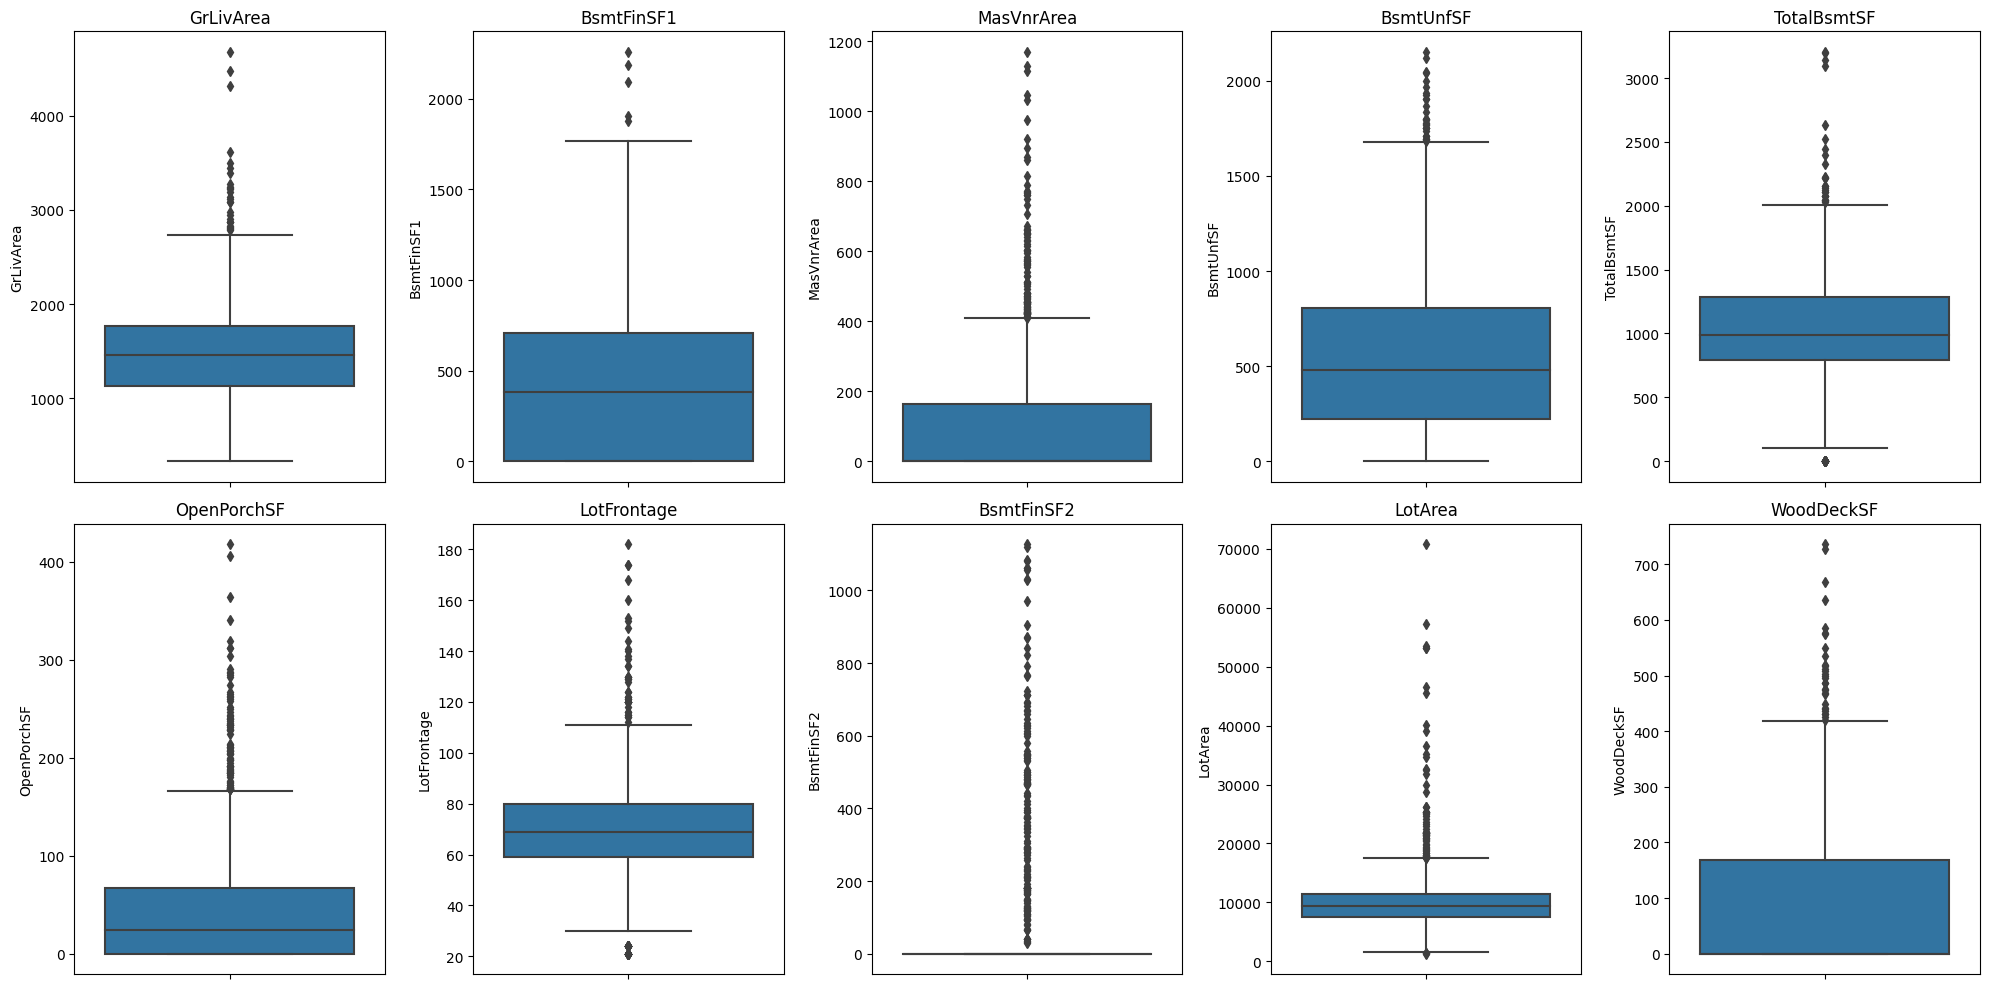

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axs = axs.ravel()
for i, column in enumerate(outliers):
    sns.boxplot(data=train_outliers_drop, y=column, ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()

In [ ]:
train_outliers_drop

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1446 rows x 80 columns]

## **3.3. Filling Missing Values**

The variables to be treated are shown.

In [ ]:
pd.DataFrame(X.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(30)

sum
Fence         2348
FireplaceQu   1420
LotFrontage    486
GarageQual     159
GarageFinish   159
GarageType     157
BsmtCond        82
BsmtExposure    82
BsmtQual        81
BsmtFinType2    80
BsmtFinType1    79
MasVnrType      24
MasVnrArea      23
MSZoning         4
Functional       2
BsmtFullBath     2
BsmtHalfBath     2
BsmtFinSF1       1
BsmtUnfSF        1
TotalBsmtSF      1
Electrical       1
BsmtFinSF2       1
KitchenQual      1
Exterior1st      1
GarageCars       1
SaleType         1
Exterior2nd      1
KitchenAbvGr     0
BedroomAbvGr     0
Fireplaces       0

### **3.3.1. Ordinal Features**

In [ ]:
ordinal = ['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1','GarageQual','BsmtCond','BsmtQual','FireplaceQu','Fence', 'KitchenQual', 'HeatingQC','ExterQual','ExterCond']
X[ordinal] = X[ordinal].fillna('NA')


### **3.3.2. Categorical features**

In [ ]:
cat = ["MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "Functional"]
X[cat].mode()

MasVnrType MSZoning Exterior1st Exterior2nd SaleType Electrical Functional
0       None       RL     VinylSd     VinylSd       WD      SBrkr        Typ

In [ ]:
X.groupby('Neighborhood')['Exterior1st'].apply(lambda x: x.mode()[0]).reset_index()

Neighborhood Exterior1st
0       Blmngtn     VinylSd
1       Blueste     MetalSd
2        BrDale     HdBoard
3       BrkSide     Wd Sdng
4       ClearCr     Wd Sdng
5       CollgCr     VinylSd
6       Crawfor     Wd Sdng
7       Edwards     Wd Sdng
8       Gilbert     VinylSd
9        IDOTRR     Wd Sdng
10      MeadowV     CemntBd
11      Mitchel     HdBoard
12        NAmes     MetalSd
13      NPkVill     Plywood
14       NWAmes     HdBoard
15      NoRidge     VinylSd
16      NridgHt     VinylSd
17      OldTown     MetalSd
18        SWISU     Wd Sdng
19       Sawyer     HdBoard
20      SawyerW     VinylSd
21      Somerst     VinylSd
22      StoneBr     VinylSd
23       Timber     VinylSd
24      Veenker     BrkFace

In [ ]:
X[cat] = X.groupby("Neighborhood")[cat].transform(lambda x: x.fillna(x.mode()[0]))

### **3.3.3. Numerical features**

In [ ]:
numbers_cols = list(X.select_dtypes(exclude='object').columns)
missing_numbers = X[numbers_cols].isnull().sum()
missing_numbers[ missing_numbers > 0 ]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageCars        1
dtype: int64

In [ ]:
X[missing_numbers[ missing_numbers > 0 ].index].describe()

LotFrontage   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  2433.000000  2896.000000  2918.000000  2918.000000  2918.000000   
mean     69.305795   102.201312   441.423235    49.582248   560.772104   
std      23.344905   179.334253   455.610826   169.205611   439.543659   
min      21.000000     0.000000     0.000000     0.000000     0.000000   
25%      59.000000     0.000000     0.000000     0.000000   220.000000   
50%      68.000000     0.000000   368.500000     0.000000   467.000000   
75%      80.000000   164.000000   733.000000     0.000000   805.500000   
max     313.000000  1600.000000  5644.000000  1526.000000  2336.000000   

       TotalBsmtSF  BsmtFullBath  BsmtHalfBath   GarageCars  
count  2918.000000   2917.000000   2917.000000  2918.000000  
mean   1051.777587      0.429894      0.061364     1.766621  
std     440.766258      0.524736      0.245687     0.761624  
min       0.000000      0.000000      0.000000     0.000000  
25%     793.000000      0.000000      0.000000     1.000000  
50%     989.500000      0.000000      0.000000     2.000000  
75%    1302.000000      1.000000      0.000000     2.000000  
max    6110.000000      3.000000      2.000000     5.000000

In [ ]:
LotFrontage_mean = X['LotFrontage'].mean()
X['LotFrontage'] = X['LotFrontage'].fillna(LotFrontage_mean)

MasVnrArea_median = X['MasVnrArea'].median()
X['MasVnrArea'] = X['MasVnrArea'].fillna(MasVnrArea_median)

## **3.4. Changing Data Type**

In [ ]:
ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

In [ ]:
ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual', 'FireplaceQu']
for col in ord_col:
    X[col] = X[col].map(ordinal_map)
    
fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    X[col] = X[col].map(fintype_map)

X['BsmtExposure'] = X['BsmtExposure'].map(expose_map)
X['Fence'] = X['Fence'].map(fence_map)

# **4. Feature Engineering**

---





Feature Engineering is a technique by which we create new features that could potentially aid in predicting our target variable, which in this case, is SalePrice.

Based on the current feature we have, the first additional featuire we can add would be TotalLot, which sums up both the LotFrontage and LotArea to identify the total area of land available as lot. We can also calculate the total number of surface area of the house, TotalSF by adding the area from basement and 2nd floor. TotalBath can also be used to tell us in total how many bathrooms are there in the house. We can also add all the different types of porches around the house and generalise into a total porch area, TotalPorch.

*   TotalLot = LotFrontage + LotArea
*   TotalSF = TotalBsmtSF + 2ndFlrSF
*   TotalBath = FullBath + HalfBath
*   TotalPorch = OpenPorchSF + EnclosedPorch + ScreenPorch
*   TotalBsmtFin = BsmtFinSF1 + BsmtFinSF2

## **4.1. Adding new features**

In [ ]:
X['TotalLot'] = X['LotFrontage'] + X['LotArea']
X['TotalBsmtFin'] = X['BsmtFinSF1'] + X['BsmtFinSF2']
X['TotalSF'] = X['TotalBsmtSF'] + X['2ndFlrSF']
X['TotalBath'] = X['FullBath'] + X['HalfBath']
X['TotalPorch'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['ScreenPorch']

In [ ]:
X['BuildToRemod'] = X['YearRemodAdd']	- X['YearBuilt'] 
X['BuildToRemod'].value_counts().sort_values(ascending=False)

 0      1560
 1       433
 30       38
 40       32
 25       27
        ... 
 66        1
 109       1
-1         1
 127       1
 105       1
Name: BuildToRemod, Length: 117, dtype: int64

## **4.2. Binay columns**

In [ ]:
columns = ['MasVnrArea','TotalBsmtFin','TotalBsmtSF','2ndFlrSF','WoodDeckSF','TotalPorch', 'BuildToRemod']

for column in columns:
    X[column +'_bin'] = X[column].apply(lambda x: 1 if x > 0 else 0)

## **4.3. Target**

Check if the distribution is skewed. Having a skewed target will affect the overall performance of our machine learning model, so one way to alleviate the situation will be to use log transformation on the skewed target to reduce the skewness of the distribution.

<Axes: xlabel='SalePrice', ylabel='Count'>

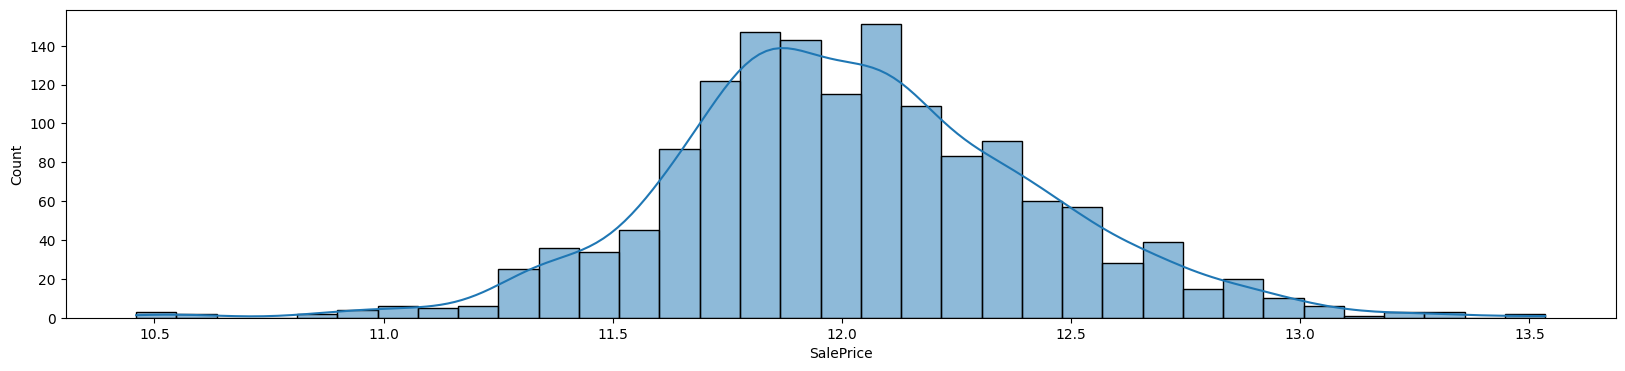

In [ ]:
y_log = np.log(y)
plt.figure(figsize=(20,4))
sns.histplot(y_log, kde=True)

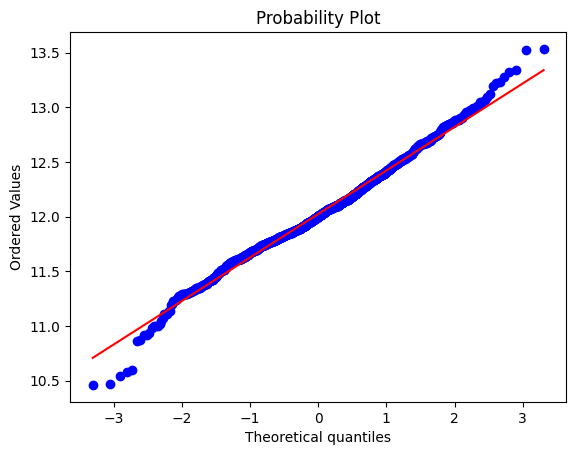

In [ ]:
res = stats.probplot(y_log, plot=plt)

# **5. Modeling**

---



In this section, the datasets are prepared and trained with the selected models.

## **5.1. Arreglo de datasets**

Get the training X

In [ ]:
X

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0             60       RL         65.0     8450      Reg         Lvl   
1             20       RL         80.0     9600      Reg         Lvl   
2             60       RL         68.0    11250      IR1         Lvl   
3             70       RL         60.0     9550      IR1         Lvl   
4             60       RL         84.0    14260      IR1         Lvl   
...          ...      ...          ...      ...      ...         ...   
2914         160       RM         21.0     1936      Reg         Lvl   
2915         160       RM         21.0     1894      Reg         Lvl   
2916          20       RL        160.0    20000      Reg         Lvl   
2917          85       RL         62.0    10441      Reg         Lvl   
2918          60       RL         74.0     9627      Reg         Lvl   

     LotConfig LandSlope Neighborhood Condition1  ... TotalBath TotalPorch  \
0       Inside       Gtl      CollgCr       Norm  ...         3         61   
1          FR2       Gtl      Veenker      Feedr  ...         2          0   
2       Inside       Gtl      CollgCr       Norm  ...         3         42   
3       Corner       Gtl      Crawfor       Norm  ...         1        307   
4          FR2       Gtl      NoRidge       Norm  ...         3         84   
...        ...       ...          ...        ...  ...       ...        ...   
2914    Inside       Gtl      MeadowV       Norm  ...         2          0   
2915    Inside       Gtl      MeadowV       Norm  ...         2         24   
2916    Inside       Gtl      Mitchel       Norm  ...         1          0   
2917    Inside       Gtl      Mitchel       Norm  ...         1         32   
2918    Inside       Mod      Mitchel       Norm  ...         3         48   

      BuildToRemod  MasVnrArea_bin  TotalBsmtFin_bin  TotalBsmtSF_bin  \
0                0               1                 1                1   
1                0               0                 1                1   
2                1               1                 1                1   
3               55               0                 1                1   
4                0               1                 1                1   
...            ...             ...               ...              ...   
2914             0               0                 0                1   
2915             0               0                 1                1   
2916            36               0                 1                1   
2917             0               0                 1                1   
2918             1               1                 1                1   

     2ndFlrSF_bin WoodDeckSF_bin TotalPorch_bin BuildToRemod_bin  
0               1              0              1                0  
1               0              1              0                0  
2               1              0              1                1  
3               1              0              1                1  
4               1              1              1                0  
...           ...            ...            ...              ...  
2914            1              0              0                0  
2915            1              0              1                0  
2916            0              1              0                1  
2917            0              1              1                0  
2918            1              1              1                1  

[2919 rows x 73 columns]

In [ ]:
X_train = X.loc[train_outliers_drop.index]

In [ ]:
X_train

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0             60       RL         65.0     8450      Reg         Lvl   
1             20       RL         80.0     9600      Reg         Lvl   
2             60       RL         68.0    11250      IR1         Lvl   
3             70       RL         60.0     9550      IR1         Lvl   
4             60       RL         84.0    14260      IR1         Lvl   
...          ...      ...          ...      ...      ...         ...   
1455          60       RL         62.0     7917      Reg         Lvl   
1456          20       RL         85.0    13175      Reg         Lvl   
1457          70       RL         66.0     9042      Reg         Lvl   
1458          20       RL         68.0     9717      Reg         Lvl   
1459          20       RL         75.0     9937      Reg         Lvl   

     LotConfig LandSlope Neighborhood Condition1  ... TotalBath TotalPorch  \
0       Inside       Gtl      CollgCr       Norm  ...         3         61   
1          FR2       Gtl      Veenker      Feedr  ...         2          0   
2       Inside       Gtl      CollgCr       Norm  ...         3         42   
3       Corner       Gtl      Crawfor       Norm  ...         1        307   
4          FR2       Gtl      NoRidge       Norm  ...         3         84   
...        ...       ...          ...        ...  ...       ...        ...   
1455    Inside       Gtl      Gilbert       Norm  ...         3         40   
1456    Inside       Gtl       NWAmes       Norm  ...         2          0   
1457    Inside       Gtl      Crawfor       Norm  ...         2         60   
1458    Inside       Gtl        NAmes       Norm  ...         1        112   
1459    Inside       Gtl      Edwards       Norm  ...         2         68   

      BuildToRemod  MasVnrArea_bin  TotalBsmtFin_bin  TotalBsmtSF_bin  \
0                0               1                 1                1   
1                0               0                 1                1   
2                1               1                 1                1   
3               55               0                 1                1   
4                0               1                 1                1   
...            ...             ...               ...              ...   
1455             1               0                 0                1   
1456            10               1                 1                1   
1457            65               0                 1                1   
1458            46               0                 1                1   
1459             0               0                 1                1   

     2ndFlrSF_bin WoodDeckSF_bin TotalPorch_bin BuildToRemod_bin  
0               1              0              1                0  
1               0              1              0                0  
2               1              0              1                1  
3               1              0              1                1  
4               1              1              1                0  
...           ...            ...            ...              ...  
1455            1              0              1                1  
1456            0              1              0                1  
1457            1              0              1                1  
1458            0              1              1                1  
1459            0              1              1                0  

[1446 rows x 73 columns]

Response variable is defined.

In [ ]:
y_config = y_log.loc[train_outliers_drop.index]

In [ ]:
y_config

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1446, dtype: float64

The X of test is defined.

In [ ]:
X_test = X.iloc[len(train_dataframe):]

In [ ]:
X_test

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
1460          20       RH         80.0    11622      Reg         Lvl   
1461          20       RL         81.0    14267      IR1         Lvl   
1462          60       RL         74.0    13830      IR1         Lvl   
1463          60       RL         78.0     9978      IR1         Lvl   
1464         120       RL         43.0     5005      IR1         HLS   
...          ...      ...          ...      ...      ...         ...   
2914         160       RM         21.0     1936      Reg         Lvl   
2915         160       RM         21.0     1894      Reg         Lvl   
2916          20       RL        160.0    20000      Reg         Lvl   
2917          85       RL         62.0    10441      Reg         Lvl   
2918          60       RL         74.0     9627      Reg         Lvl   

     LotConfig LandSlope Neighborhood Condition1  ... TotalBath TotalPorch  \
1460    Inside       Gtl        NAmes      Feedr  ...         1        120   
1461    Corner       Gtl        NAmes       Norm  ...         2         36   
1462    Inside       Gtl      Gilbert       Norm  ...         3         34   
1463    Inside       Gtl      Gilbert       Norm  ...         3         36   
1464    Inside       Gtl      StoneBr       Norm  ...         2        226   
...        ...       ...          ...        ...  ...       ...        ...   
2914    Inside       Gtl      MeadowV       Norm  ...         2          0   
2915    Inside       Gtl      MeadowV       Norm  ...         2         24   
2916    Inside       Gtl      Mitchel       Norm  ...         1          0   
2917    Inside       Gtl      Mitchel       Norm  ...         1         32   
2918    Inside       Mod      Mitchel       Norm  ...         3         48   

      BuildToRemod  MasVnrArea_bin  TotalBsmtFin_bin  TotalBsmtSF_bin  \
1460             0               0                 1                1   
1461             0               1                 1                1   
1462             1               0                 1                1   
1463             0               1                 1                1   
1464             0               0                 1                1   
...            ...             ...               ...              ...   
2914             0               0                 0                1   
2915             0               0                 1                1   
2916            36               0                 1                1   
2917             0               0                 1                1   
2918             1               1                 1                1   

     2ndFlrSF_bin WoodDeckSF_bin TotalPorch_bin BuildToRemod_bin  
1460            0              1              1                0  
1461            0              1              1                0  
1462            1              1              1                1  
1463            1              1              1                0  
1464            0              0              1                0  
...           ...            ...            ...              ...  
2914            1              0              0                0  
2915            1              0              1                0  
2916            0              1              0                1  
2917            0              1              1                0  
2918            1              1              1                1  

[1459 rows x 73 columns]

The training dataset is defined.

In [ ]:
train_dataframe_config = pd.concat([X_train, y_config], axis=1)

In [ ]:
train_dataframe_config

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0             60       RL         65.0     8450      Reg         Lvl   
1             20       RL         80.0     9600      Reg         Lvl   
2             60       RL         68.0    11250      IR1         Lvl   
3             70       RL         60.0     9550      IR1         Lvl   
4             60       RL         84.0    14260      IR1         Lvl   
...          ...      ...          ...      ...      ...         ...   
1455          60       RL         62.0     7917      Reg         Lvl   
1456          20       RL         85.0    13175      Reg         Lvl   
1457          70       RL         66.0     9042      Reg         Lvl   
1458          20       RL         68.0     9717      Reg         Lvl   
1459          20       RL         75.0     9937      Reg         Lvl   

     LotConfig LandSlope Neighborhood Condition1  ... TotalPorch BuildToRemod  \
0       Inside       Gtl      CollgCr       Norm  ...         61            0   
1          FR2       Gtl      Veenker      Feedr  ...          0            0   
2       Inside       Gtl      CollgCr       Norm  ...         42            1   
3       Corner       Gtl      Crawfor       Norm  ...        307           55   
4          FR2       Gtl      NoRidge       Norm  ...         84            0   
...        ...       ...          ...        ...  ...        ...          ...   
1455    Inside       Gtl      Gilbert       Norm  ...         40            1   
1456    Inside       Gtl       NWAmes       Norm  ...          0           10   
1457    Inside       Gtl      Crawfor       Norm  ...         60           65   
1458    Inside       Gtl        NAmes       Norm  ...        112           46   
1459    Inside       Gtl      Edwards       Norm  ...         68            0   

      MasVnrArea_bin  TotalBsmtFin_bin  TotalBsmtSF_bin  2ndFlrSF_bin  \
0                  1                 1                1             1   
1                  0                 1                1             0   
2                  1                 1                1             1   
3                  0                 1                1             1   
4                  1                 1                1             1   
...              ...               ...              ...           ...   
1455               0                 0                1             1   
1456               1                 1                1             0   
1457               0                 1                1             1   
1458               0                 1                1             0   
1459               0                 1                1             0   

     WoodDeckSF_bin TotalPorch_bin BuildToRemod_bin  SalePrice  
0                 0              1                0  12.247694  
1                 1              0                0  12.109011  
2                 0              1                1  12.317167  
3                 0              1                1  11.849398  
4                 1              1                0  12.429216  
...             ...            ...              ...        ...  
1455              0              1                1  12.072541  
1456              1              0                1  12.254863  
1457              0              1                1  12.493130  
1458              1              1                1  11.864462  
1459              1              1                0  11.901583  

[1446 rows x 74 columns]

A validation set of the training set is obtained.

In [ ]:
def split_dataset(dataset, test_ratio=0.25):
  train_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~train_indices], dataset[train_indices]

train_ds_pd, valid_ds_pd = split_dataset(train_dataframe_config)
print("{} examples in training, {} examples in valid.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1110 examples in training, 336 examples in valid.


The datasets are obtained ready to be occupied with the models.

In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label='SalePrice', task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label='SalePrice', task = tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_test, task = tfdf.keras.Task.REGRESSION)

## **5.2. Training and validation**

Decision forests (DFs) are a large family of machine learning algorithms for classification, regression, and supervised classification. As its name suggests, DFs use decision trees as a building block. Today, the two most popular DF training algorithms are random forests and gradient-powered decision trees. Both algorithms are ensemble techniques that use multiple decision trees, but they differ in how they do it.

In [ ]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

Random Forest Model: This model implements a set of decision trees that vote for the final prediction. Each tree is trained with a random subset of the data and available variables to reduce correlation between trees and improve generalizability.

Gradient Boosted Trees Model: This model also uses a set of decision trees, but instead of training each tree independently, each tree is trained to correct for errors made by the previous model in the sequence. This process is repeated for multiple trees until a certain number of trees is reached or a performance threshold is reached.

Cart Model: This model is a single decision tree that is built by dividing the data into smaller and smaller subsets based on a series of criteria. Each leaf on the tree corresponds to a prediction.

Distributed Gradient Boosted Trees Model: This model is a variant of GradientBoostedTreesModel that is distributedly trained across multiple nodes. Each node has a copy of the data and trains its own model, which is then shared and merged with the models of other nodes. This process allows you to train larger models and reduce training time. The latter is not dealt with because it is used for large amounts of data and is distributed.

In [ ]:
rfm = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
gbtm = tfdf.keras.GradientBoostedTreesModel(task = tfdf.keras.Task.REGRESSION)
cm = tfdf.keras.CartModel(task = tfdf.keras.Task.REGRESSION)

Use /tmp/tmpuv3byh25 as temporary training directory
Use /tmp/tmpuqed109a as temporary training directory
Use /tmp/tmp_tjcp4bp as temporary training directory


In [ ]:
models = [rfm,gbtm,cm]

A function is defined to carry out the training with each of the models.

In [ ]:
def test_models(train, validation):
  for model in models:
    #evaluation metrics
    print(str(model))
    model.compile(metrics=["mse"])
    # training
    model.fit(x=train)
    # valdiation
    evaluation = model.evaluate(x=validation,return_dict=True)
    for name, value in evaluation.items():
      print(f"{name}: {value:.6f}" + "\n")

Training is done.

In [ ]:
test_models(train_ds, valid_ds)

Reading training dataset...
Training dataset read in 0:00:10.259128. Found 1110 examples.
Training model...
Model trained in 0:00:03.318598
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.
1/1 [==============================] - 1s 609ms/step - loss: 0.0000e+00 - mse: 0.0129
loss: 0.000000

mse: 0.012890

Reading training dataset...
Training dataset read in 0:00:00.922772. Found 1110 examples.
Training model...
Model trained in 0:00:05.651919
Compiling model...
Model compiled.
1/1 [==============================] - 1s 543ms/step - loss: 0.0000e+00 - mse: 0.0131
loss: 0.000000

mse: 0.013097

Reading training dataset...
Training dataset read in 0:00:01.487373. Found 1110 examples.
Training model...
Model trained in 0:00:00.079097
Compiling model...
Model compiled.
1/1 [==============================] - 0s 329ms/step - loss: 0.0000e+00 - mse: 0.0356
loss: 0.000000

mse: 0.0355

It is observed that the gradient model is the one that achieves the lowest MSE.

RSE and RMSE are common measures of the accuracy of a regression model. RSE stands for "Residual Standard Error", while RMSE stands for "Root Mean Squared Error". Both measures assess the difference between the observed values and the values predicted by a model, with a lower value indicating that the model has a better ability to predict correctly.

The RSE is a measure of the standard error of the residuals, that is, the standard deviation of the difference between the observed values and the values predicted by the model. RSE is commonly used to assess the accuracy of linear regression models.

The RMSE is a similar measure to the RSE, but it is the square root of the mean square error, which is the mean of the squared errors between the observed values and the values predicted by the model. The RMSE is a measure of the magnitude of the model's prediction error and is commonly used to assess the accuracy of nonlinear regression models.

# **6. Interpretation of results.**

---



Below are some notes to obtain more information for the comparison of the models.

**Creating the inspector**

This object allows you to inspect the trained model to get information about how the decisions to make predictions were made.

In [ ]:
rfm_inspector = rfm.make_inspector()

In [ ]:
gbtm_inspector = gbtm.make_inspector()

**Evaluation**

In [ ]:
rfm_inspector.evaluation()

Evaluation(num_examples=1110, accuracy=None, loss=None, rmse=0.1403408167817375, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
gbtm_inspector.evaluation()

Evaluation(num_examples=None, accuracy=None, loss=0.15140025317668915, rmse=0.15140025317668915, ndcg=None, aucs=None, auuc=None, qini=None)

## **6.1. Root Mean Squared Error**

The change in RMSE across the iterations is shown below.

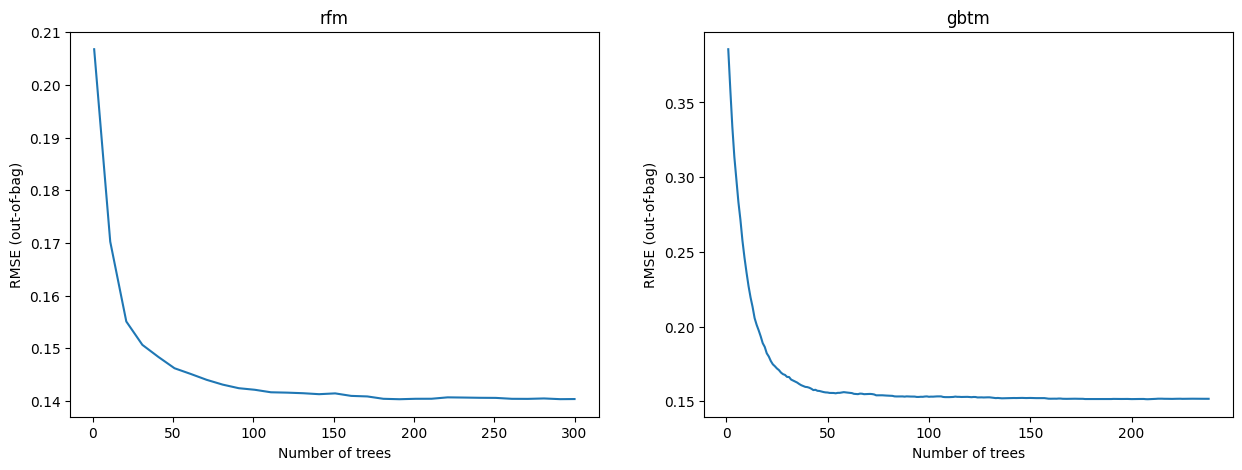

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axs = axs.ravel()

logs_rfm = rfm_inspector.training_logs()
logs_gbtm= gbtm_inspector.training_logs()

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs_rfm], [log.evaluation.rmse for log in logs_rfm])
plt.title("rfm")
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")

plt.subplot(1, 2, 2)
#logs_gbtm = gbtm_inspector().training_logs()
plt.plot([log.num_trees for log in logs_gbtm], [log.evaluation.rmse for log in logs_gbtm])
plt.title("gbtm")
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

plt.show()

## **6.2. Visualization of the branch**

In [ ]:
tfdf.model_plotter.plot_model_in_colab(rfm, tree_idx=0, max_depth=3)

In [ ]:
tfdf.model_plotter.plot_model_in_colab(gbtm, tree_idx=0, max_depth=3)

In [ ]:
tfdf.model_plotter.plot_model_in_colab(cm, tree_idx=0, max_depth=3)

## **6.3. Important variables**

In [ ]:
inspector = rfm.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1110, accuracy=None, loss=None, rmse=0.1403408167817375, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_NODES
	 NUM_AS_ROOT
	 SUM_SCORE


In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #54), 104.0),
 ("ExterQual" (1; #21), 51.0),
 ("Neighborhood" (4; #51), 47.0),
 ("TotalSF" (1; #68), 40.0),
 ("KitchenQual" (1; #39), 20.0),
 ("GrLivArea" (1; #34), 15.0),
 ("YearBuilt" (1; #71), 13.0),
 ("BsmtQual" (1; #12), 3.0),
 ("GarageCars" (1; #30), 3.0),
 ("TotalBath" (1; #60), 2.0),
 ("FullBath" (1; #28), 1.0),
 ("GarageFinish" (4; #31), 1.0)]

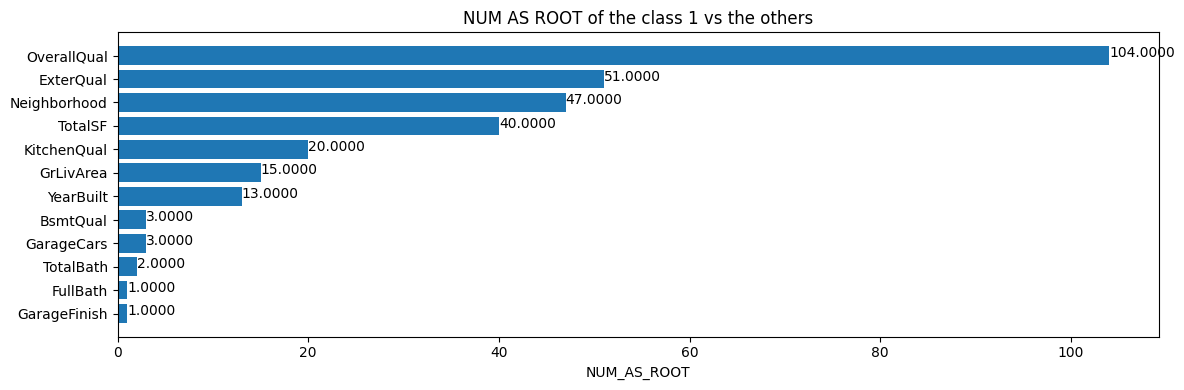

In [ ]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

# **7. Test calculation**

---



Finally, the prediction will be made with the test data.

In [ ]:
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')
print(ids)

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64


In [ ]:
preds = rfm.predict(test_ds)
output = pd.DataFrame({'Id': ids, 'SalePrice': np.exp(preds.squeeze())})

output.head()

2/2 [==============================] - 1s 84ms/step


Id      SalePrice
0  1461  122640.593750
1  1462  158983.375000
2  1463  180497.250000
3  1464  182705.734375
4  1465  188290.343750

In [ ]:
output.to_csv('submission_house_price.csv', index=False)